In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("hearts.csv")

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
df.shape

(445132, 37)

In [ ]:
df.isna().sum()/len(df)*100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.269134
PhysicalHealthDays            2.454777
MentalHealthDays              2.036924
LastCheckupTime               1.866413
PhysicalActivities            0.245545
SleepHours                    1.225030
RemovedTeeth                  2.552052
HadHeartAttack                0.688560
HadAngina                     0.989594
HadStroke                     0.349784
HadAsthma                     0.398309
HadSkinCancer                 0.706083
HadCOPD                       0.498504
HadDepressiveDisorder         0.631723
HadKidneyDisease              0.432681
HadArthritis                  0.591510
HadDiabetes                   0.244197
DeafOrHardOfHearing           4.638399
BlindOrVisionDifficulty       4.844406
DifficultyConcentrating       5.445576
DifficultyWalking             5.394355
DifficultyDressingBathing     5.372564
DifficultyErrands             5.763684
SmokerStatus             

In [ ]:
df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     24
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

In [ ]:
## first, we remove rows with NaN values in the label, i.e., HadHeartAttack
df = df.dropna(subset=['HadHeartAttack'])
df.shape

(442067, 37)

In [ ]:
df['HadHeartAttack'] = df['HadHeartAttack'].replace({'Yes': 1, 'No': 0})

In [ ]:
import plotly.express as px

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Guam': 'GU', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI'
}

state_probs = df.groupby('State')['HadHeartAttack'].mean().reset_index()
state_probs['State'] = state_probs['State'].map(state_abbreviations)

min_prob = state_probs['HadHeartAttack'].min()
max_prob = state_probs['HadHeartAttack'].max()

# Plotting
fig = px.choropleth(state_probs,
                    locations='State',
                    locationmode="USA-states",
                    color='HadHeartAttack',
                    color_continuous_scale="Viridis",
                    range_color=(min_prob, max_prob),  # Set the scale to the min and max of your data
                    scope="usa",
                    labels={'HadHeartAttack': 'Probability of Heart Attack'}
                   )

fig.update_layout(title_text = 'Probability of Having a Heart Attack by State among All Survey Participants')
fig.show()

In [ ]:
state_probs_sorted = state_probs.sort_values('HadHeartAttack')

fig = px.bar(state_probs_sorted,
             x='State',
             y='HadHeartAttack',
             labels={'HadHeartAttack': 'Probability of Heart Attack', 'State': 'State Abbreviation'},
             title='Probability of Having a Heart Attack by State (Ranked)')

fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_title="State",
    yaxis_title="Heart Attack Probability among Survey Participants",
    yaxis=dict(tickformat=".2%"),
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=12,
    width=1200,
)

fig.show()

# Data clearning

In [ ]:
df.describe(include='object')

State     Sex GeneralHealth  \
count       442067  442067        440972   
unique          54       2             5   
top     Washington  Female     Very good   
freq         25997  234519        147967   

                                          LastCheckupTime PhysicalActivities  \
count                                              434026             441095   
unique                                                  4                  2   
top     Within past year (anytime less than 12 months ...                Yes   
freq                                               348653             335778   

        RemovedTeeth HadAngina HadStroke HadAsthma HadSkinCancer  ...  \
count         431057    438479    440997    440630        439303  ...   
unique             4         2         2         2             2  ...   
top     None of them        No        No        No            No  ...   
freq          232493    412331    422101    374481        404040  ...   

       DifficultyErrands  SmokerStatus  \
count             416836        407126   
unique                 2             4   
top                   No  Never smoked   
freq              384949        244613   

                                  ECigaretteUsage ChestScan  \
count                                      406924    386779   
unique                                          4         2   
top     Never used e-cigarettes in my entire life        No   
freq                                       310133    222305   

           RaceEthnicityCategory   AgeCategory AlcoholDrinkers HIVTesting  \
count                     428369        433260          396130     376757   
unique                         5            13               2          2   
top     White only, Non-Hispanic  Age 65 to 69             Yes         No   
freq                      318782         46808          210023     248383   

       HighRiskLastYear CovidPos  
count            392082   391940  
unique                2        3  
top                  No       No  
freq             374996   268266  

[4 rows x 30 columns]

In [ ]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())

    print('-------------------------------------------------')

Column Name:  State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
-------------------------------------------------
Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
-------------------------------------------------
Column Name:  LastCheckupTime
['Within past year (anytime less than 12 

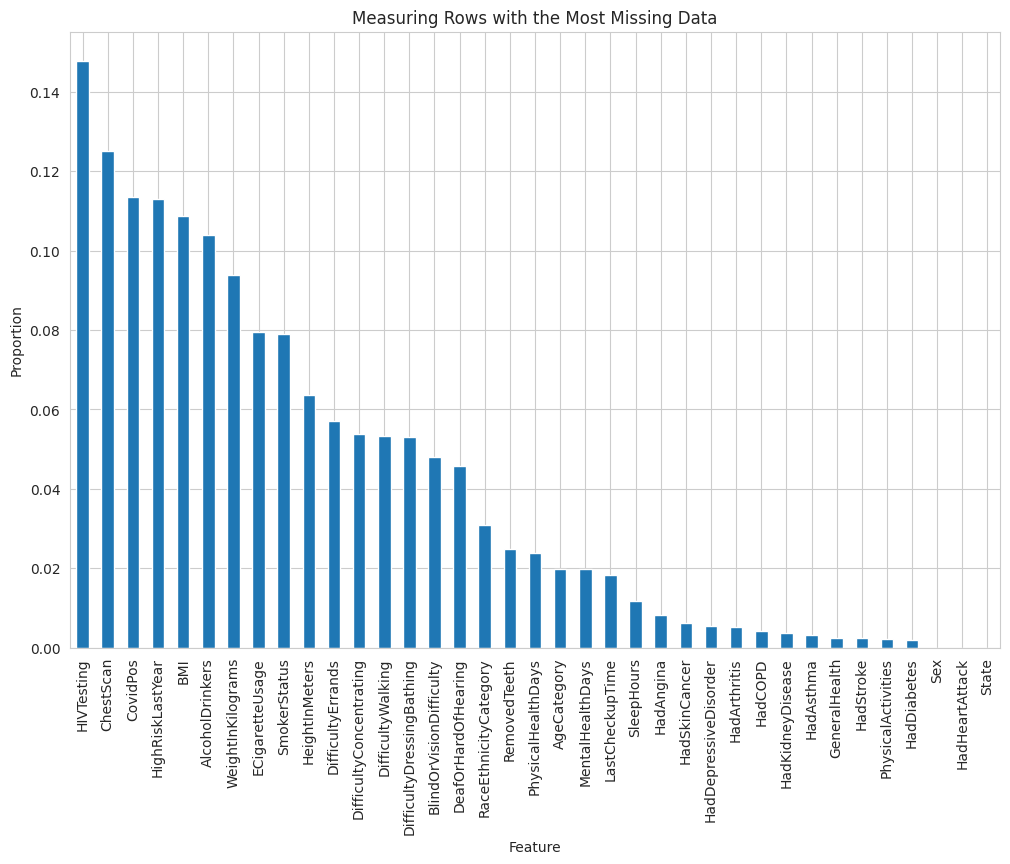

In [ ]:
# What's missing?
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = df.isna().sum()/df.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)
ax = missing_vals.plot(kind='bar')

ax.set_title('Measuring Rows with the Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=90)

In [ ]:
# we drop less relavant features to decrease feature dimensions
# removed teeth: no direct correlation
# HIVTesting: Unclear. It can represent whether the participant had took the HIV test. It can also represent whether the participant got a positive/negative result from the HIV test.
# HighRiskLastYear: We have no idea what risks are involved here.
df = df.drop(columns=['RemovedTeeth', 'HIVTesting', 'HighRiskLastYear'])
print(df.columns)
print(df.shape)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos'],
      dtype='object')
(442067, 34)


# Feature Editing

In [ ]:
df.shape

(442067, 34)

In [ ]:
# State
df['State_Abbr'] = df['State'].map(state_abbreviations)
df = pd.merge(df, state_probs, left_on = 'State_Abbr', right_on = 'State', how = 'left')

df['HeartAttackStateLevel'] = (df['HadHeartAttack_y'] * 100).astype(int)
df['HadHeartAttack'] = df['HadHeartAttack_x']
df.drop(columns=['State_Abbr', 'State_x', 'State_y', 'HadHeartAttack_x', 'HadHeartAttack_y'], inplace=True)
df.head(10)


Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Female     Very good                 0.0               0.0   
1  Female     Excellent                 0.0               0.0   
2  Female     Very good                 2.0               3.0   
3  Female     Excellent                 0.0               0.0   
4  Female          Fair                 2.0               0.0   
5    Male          Poor                 1.0               0.0   
6  Female     Very good                 0.0               0.0   
7  Female          Good                 0.0               0.0   
8  Female          Good                 0.0               0.0   
9  Female          Good                 1.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   
5  Within past year (anytime less than 12 months ...                 No   
6  Within past year (anytime less than 12 months ...                Yes   
7  Within past year (anytime less than 12 months ...                 No   
8  Within past year (anytime less than 12 months ...                Yes   
9  Within past year (anytime less than 12 months ...                Yes   

   SleepHours HadAngina HadStroke HadAsthma  ... ChestScan  \
0         8.0        No        No        No  ...        No   
1         6.0        No        No        No  ...        No   
2         5.0        No        No        No  ...        No   
3         7.0        No        No       Yes  ...       Yes   
4         9.0        No        No        No  ...       Yes   
5         7.0        No       Yes        No  ...        No   
6         7.0        No        No        No  ...        No   
7         8.0        No        No        No  ...       Yes   
8         6.0        No        No        No  ...       NaN   
9         7.0        No        No        No  ...       NaN   

      RaceEthnicityCategory      AgeCategory HeightInMeters WeightInKilograms  \
0  White only, Non-Hispanic  Age 80 or older            NaN               NaN   
1  White only, Non-Hispanic  Age 80 or older           1.60             68.04   
2  White only, Non-Hispanic     Age 55 to 59           1.57             63.50   
3  White only, Non-Hispanic              NaN           1.65             63.50   
4  White only, Non-Hispanic     Age 40 to 44           1.57             53.98   
5  White only, Non-Hispanic  Age 80 or older           1.80             84.82   
6  Black only, Non-Hispanic  Age 80 or older           1.65             62.60   
7  White only, Non-Hispanic  Age 80 or older           1.63             73.48   
8  White only, Non-Hispanic     Age 75 to 79           1.70               NaN   
9  White only, Non-Hispanic     Age 70 to 74           1.68             81.65   

     BMI AlcoholDrinkers CovidPos HeartAttackStateLevel HadHeartAttack  
0    NaN              No       No                     6              0  
1  26.57              No       No                     6              0  
2  25.61              No      Yes                     6              0  
3  23.30              No       No                     6              0  
4  21.77             Yes       No                     6              0  
5  26.08              No       No                     6              1  
6  22.96             Yes       No                     6              0  
7  27.81              No       No                     6              0  
8    NaN              No       No                     6              0  
9  29.05             Yes       No                     6              0  

[10 rows x 34 columns]

In [ ]:
# Sex
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_dummies], axis=1)
# df.drop(columns = 'Sex', inplace = True)
df.shape

(442067, 36)

In [ ]:
# GeneralHealth
df['GeneralHealth'].replace({'Poor' : 1,
                             'Fair' : 2,
                             'Good' : 3,
                             'Very good' : 4,
                             'Excellent' : 5}, inplace=True)

df['GeneralHealth'].unique()

array([ 4.,  5.,  2.,  1.,  3., nan])

In [ ]:
# PhysicalHealthDays and MentalHealthDays are all monthly data, no need to process
print(max(df['PhysicalHealthDays']))
print(max(df['MentalHealthDays']))

30.0
30.0


In [ ]:
df['LastCheckupTime'].replace({'Within past year (anytime less than 12 months ago)' : '1',
                               'Within past 2 years (1 year but less than 2 years ago)' : '1-2',
                               'Within past 5 years (2 years but less than 5 years ago)' : '2-5',
                               '5 or more years ago' : '5+'}, inplace=True)

check_dummies = pd.get_dummies(df['LastCheckupTime'], prefix='LastCheckupTime')
df = pd.concat([df, check_dummies], axis=1)
# df.drop(columns = 'LastCheckupTime', inplace = True)
df.shape

(442067, 40)

In [ ]:
df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'Borderline',
                           'Yes, but only during pregnancy (female)' : 'Pregnancy'} , inplace=True)

diabetes_dummies = pd.get_dummies(df['HadDiabetes'], prefix='Diabetes')
df = pd.concat([df, diabetes_dummies], axis=1)
# df.drop(columns = 'HadDiabetes', inplace = True)
df.shape

(442067, 44)

In [ ]:
df['SmokerStatus'].replace({'Current smoker - now smokes some days' : 'Sometimes',
                            'Current smoker - now smokes every day' : 'Everyday',
                            'Former smoker' : 'Former',
                            'Never smoked' : 'Never'}, inplace=True)
smoker_dummies = pd.get_dummies(df['SmokerStatus'], prefix='Smoker')
df = pd.concat([df, smoker_dummies], axis=1)
# df.drop(columns = 'SmokerStatus', inplace = True)
df.shape

(442067, 48)

In [ ]:
df['ECigaretteUsage'].replace({'Not at all (right now)' : 'Former',
                               'Never used e-cigarettes in my entire life' : 'Never',
                               'Use them every day' : 'Everyday',
                               'Use them some days' : 'Sometimes'}, inplace=True)
vape_dummies = pd.get_dummies(df['ECigaretteUsage'], prefix='Vape')
df = pd.concat([df, vape_dummies], axis=1)
# df.drop(columns = 'ECigaretteUsage', inplace = True)
df.shape

(442067, 52)

In [ ]:
df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic' : 'White',
                                     'Black only, Non-Hispanic' : 'Black',
                                     'Other race only, Non-Hispanic' : 'Other',
                                     'Multiracial, Non-Hispanic' : 'Mixed'}, inplace=True)
race_dummies = pd.get_dummies(df['RaceEthnicityCategory'], prefix='Race')
df = pd.concat([df, race_dummies], axis=1)
# df.drop(columns = 'RaceEthnicityCategory', inplace = True)
df.shape

(442067, 57)

In [ ]:
df.dropna(subset = ['AgeCategory'], inplace = True)
df['AgeCategory'].replace({'Age 80 or older' : '80+'}, inplace=True)

for value in df['AgeCategory'].unique()[1:]:
    value = str(value)
    if value != 'nan':
        cat_value = value.split(" ")
        df['AgeCategory'].replace({value : cat_value[1]+"-"+cat_value[3]}, inplace=True)

age_group_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_group_order, ordered=True)
df['AgeCategory'] = df['AgeCategory'].cat.codes + 1
print(df['AgeCategory'].unique())
# df.drop(columns = 'AgeCategory', inplace = True)



[13  8  5 12 11 10  9  7  6  4  2  3  1]


In [ ]:
## Tested positive using home test without a health professional should also be considered as positive
df['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)
df['CovidPos'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# all yes/no values:
df = df.replace({'Yes': 1, 'No': 0})

In [ ]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

# drop NaN values as all empty values are not informative
df.dropna(inplace = True)
df.isna().sum()/len(df)*100

Sex                          0.0
GeneralHealth                0.0
PhysicalHealthDays           0.0
MentalHealthDays             0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
SleepHours                   0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
HeightInMeters               0.0
WeightInKilograms            0.0
BMI                          0.0
AlcoholDri

In [ ]:
# Since BMI can be directly obtained from HeightsHeightInMeters and WeightInKilograms, we transform this into a categorical variable HadObesity
# HadObesity uses the threshold BMI = 30 to identify if a participant is obese or not.
df['HadObesity'] = df['BMI'].apply(lambda x: 1 if x >=30 else 0)
# df = df.drop(columns = ['BMI'])

In [ ]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'CovidPos', 'HeartAttackStateLevel', 'HadHeartAttack', 'Sex_Female',
       'Sex_Male', 'LastCheckupTime_1', 'LastCheckupTime_1-2',
       'LastCheckupTime_2-5', 'LastCheckupTime_5+', 'Diabetes_Borderline',
       'Diabetes_No', 'Diabetes_Pregnancy', 'Diabetes_Yes', 'Smoker_Everyday',
       'Smoker_Former', 'Smoker_Never', 'Smoker_Sometimes', 'Vape_Everyday',
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303212 entries, 2 to 442065
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        303212 non-null  object 
 1   GeneralHealth              303212 non-null  float64
 2   PhysicalHealthDays         303212 non-null  float64
 3   MentalHealthDays           303212 non-null  float64
 4   LastCheckupTime            303212 non-null  object 
 5   PhysicalActivities         303212 non-null  float64
 6   SleepHours                 303212 non-null  float64
 7   HadAngina                  303212 non-null  float64
 8   HadStroke                  303212 non-null  float64
 9   HadAsthma                  303212 non-null  float64
 10  HadSkinCancer              303212 non-null  float64
 11  HadCOPD                    303212 non-null  float64
 12  HadDepressiveDisorder      303212 non-null  float64
 13  HadKidneyDisease           303212 

In [ ]:
df.shape

(303212, 58)

# EDA

## Categorical Data Analysis

<ipython-input-35-598ab316e0b0>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



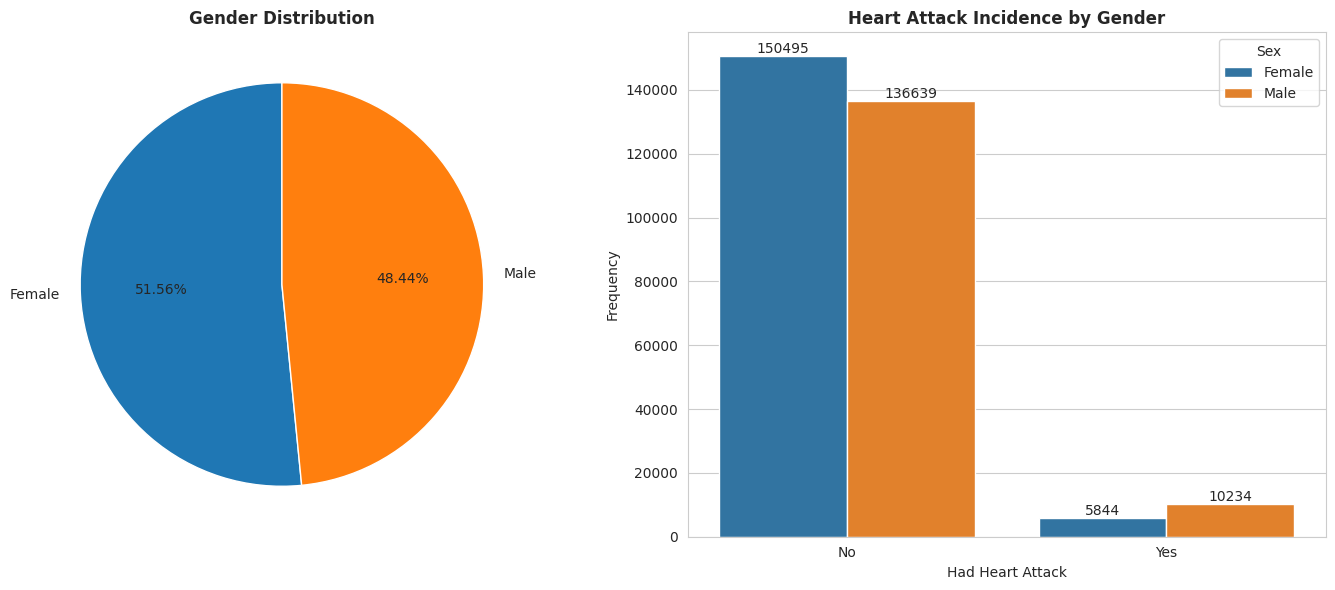

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sex_counts = df['Sex'].value_counts()
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%.2f%%', startangle=90)
axes[0].set_title("Gender Distribution", weight='bold')

sns.countplot(ax=axes[1], data=df, x='HadHeartAttack', hue='Sex')
axes[1].set_title("Heart Attack Incidence by Gender", weight='bold')
axes[1].set_xlabel("Had Heart Attack")
axes[1].set_ylabel("Frequency")
axes[1].set_xticklabels(['No', 'Yes'])
for c in axes[1].containers:
    axes[1].bar_label(c)

plt.tight_layout()
plt.show()

In [ ]:
female_incidence = 6180 / 157914 * 100
male_incidence = 10615 / 143272 * 100
print(f'Among survey participants, {female_incidence}% female had heart attacks.')
print(f'Among survey participants, {male_incidence}% male had heart attacks.')

Among survey participants, 3.91352255024887% female had heart attacks.
Among survey participants, 7.408984309565023% male had heart attacks.


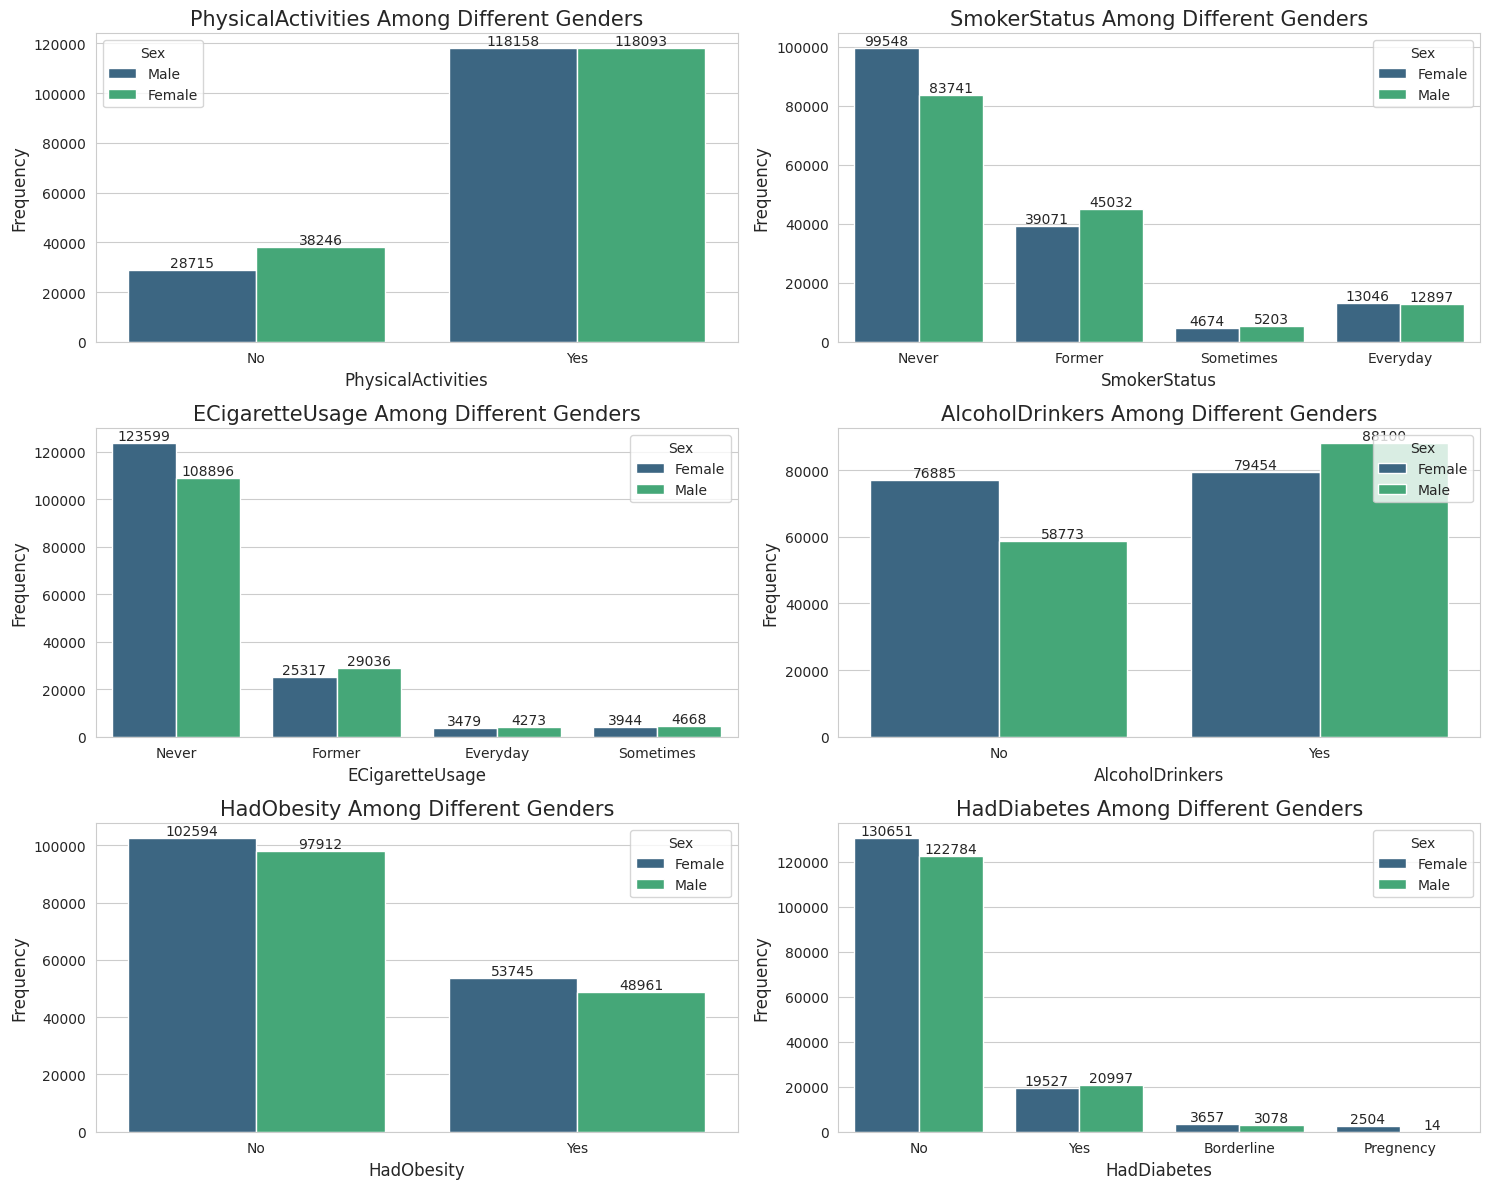

In [ ]:
# We want to take a look at this difference. What contributes to the double chance of having heart attacks for male compared to female?
# We pick six main external contributors to analyze if these are related to the difference of probability.
plt.figure(figsize=(15, 12))
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'HadObesity', 'HadDiabetes']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='Sex', palette='viridis')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=15)
    plt.xlabel(risk_factor, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    if risk_factor in ['PhysicalActivities', 'AlcoholDrinkers', 'HadObesity']:
        plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    if risk_factor == 'HadDiabetes':
        plt.xticks(ticks = [0, 1, 2, 3], labels = ['No', 'Yes', 'Borderline', 'Pregnency'])
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

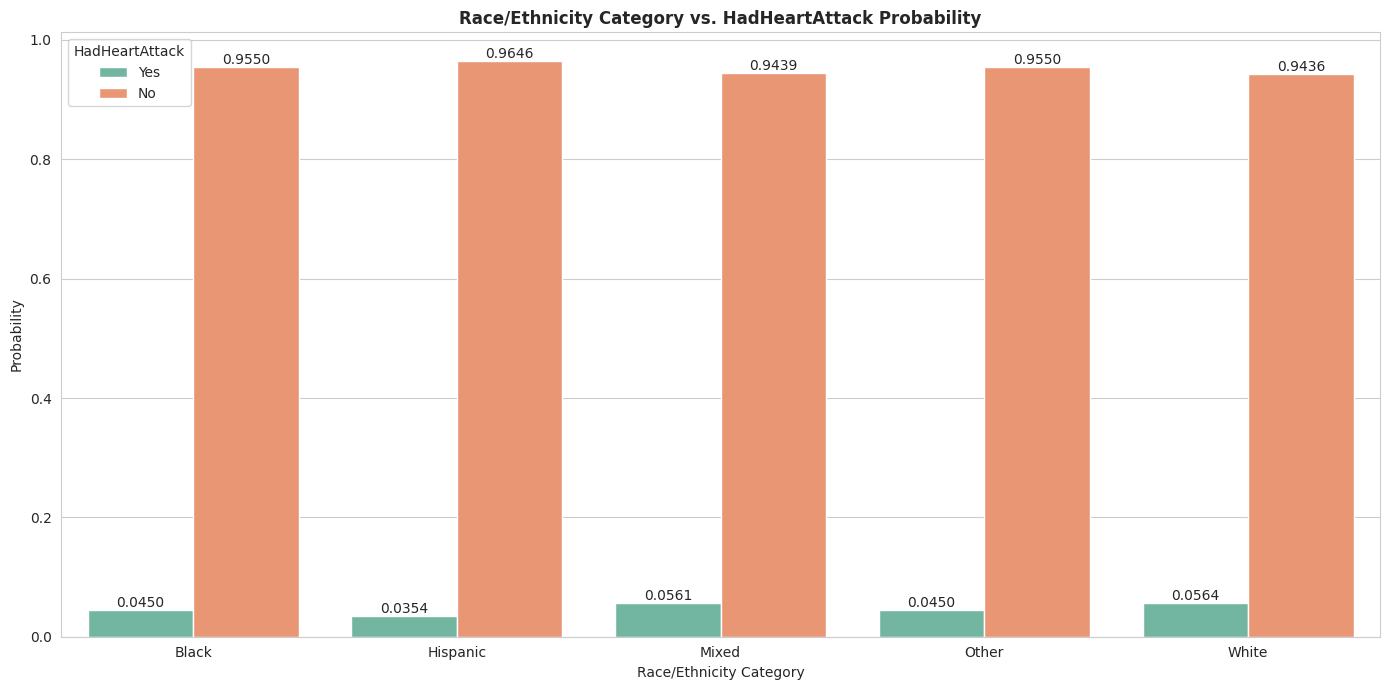

In [ ]:
## race

df['HadHeartAttack'] = df['HadHeartAttack'].map({1: 'Yes', 0: 'No'})
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].astype(str)

plt.figure(figsize=(14, 7))
race_ethnicity_proportions = df.groupby('RaceEthnicityCategory')['HadHeartAttack'].value_counts(normalize=True).rename('proportion').reset_index()

ax = sns.barplot(x='RaceEthnicityCategory', y='proportion', hue='HadHeartAttack', data=race_ethnicity_proportions, palette='Set2', hue_order=['Yes', 'No'])
plt.title('Race/Ethnicity Category vs. HadHeartAttack Probability', weight='bold')
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Probability')
# Adding bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()


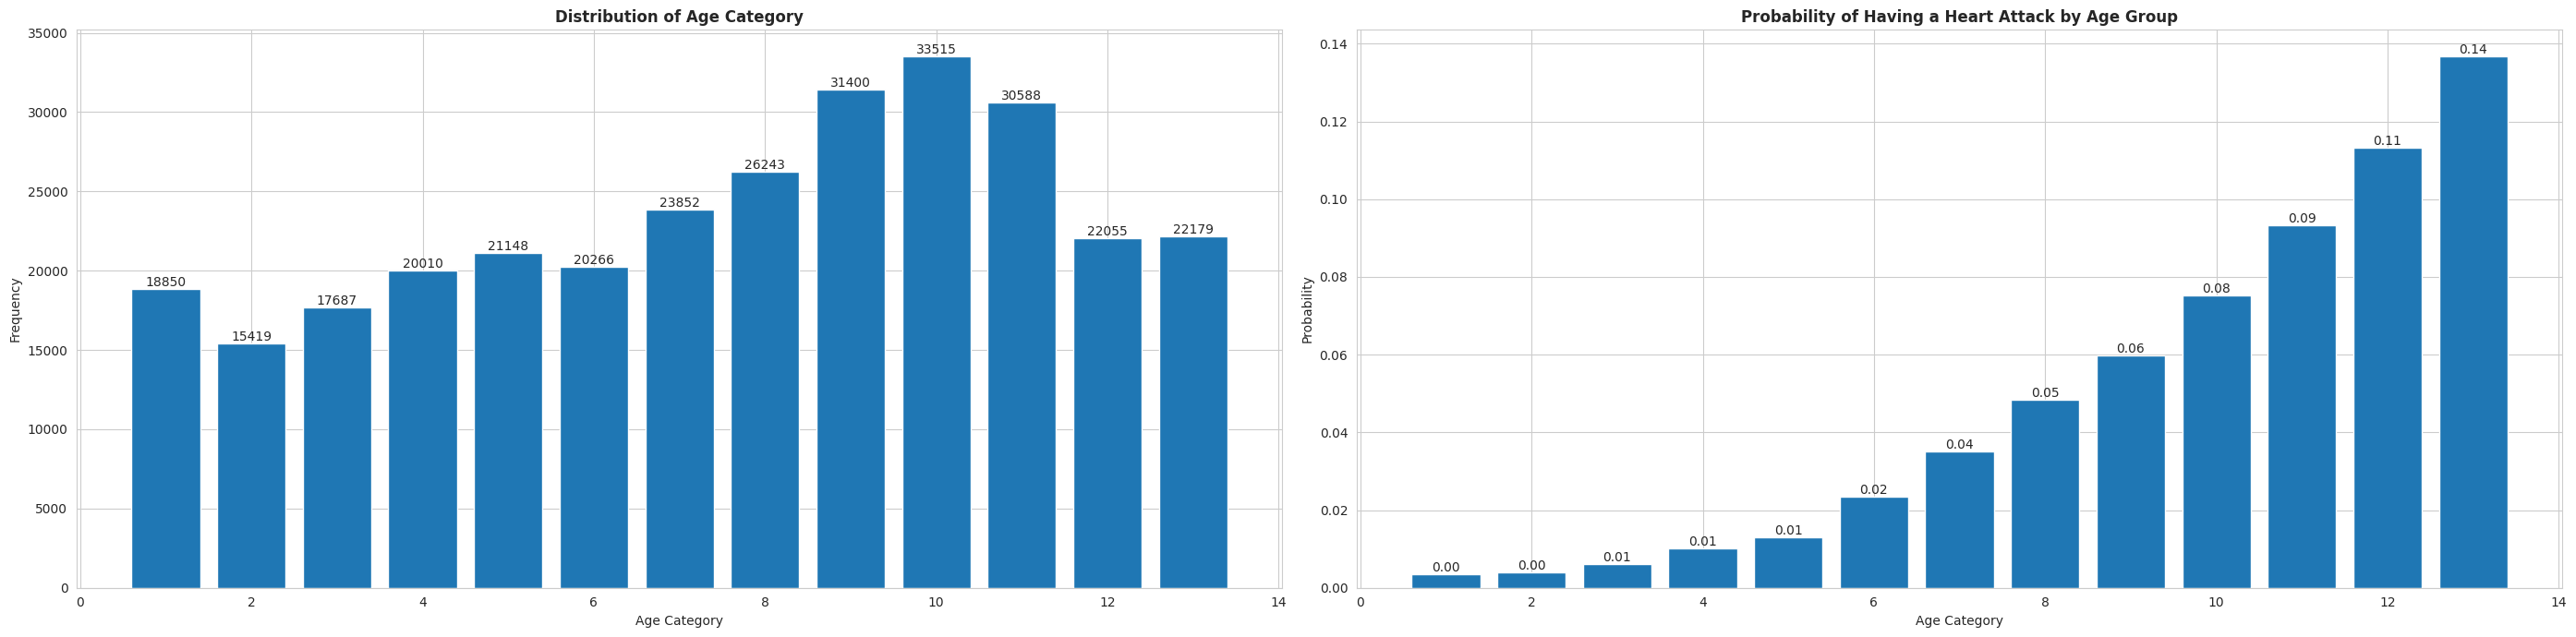

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 7))

# Plot 1: Distribution of Age Category
age_counts = df['AgeCategory'].value_counts().sort_index()
bars1 = axes[0].bar(age_counts.index, age_counts.values)
axes[0].set_title("Distribution of Age Category", weight='bold')
axes[0].set_xlabel("Age Category")
axes[0].set_ylabel("Frequency")

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Plot 2: Probability of Having a Heart Attack by Age Group
age_group_totals = df['AgeCategory'].value_counts().sort_index()
heart_attacks_by_age_group = df[df['HadHeartAttack'] == 'Yes']['AgeCategory'].value_counts().sort_index()
probability_of_heart_attack = heart_attacks_by_age_group / age_group_totals

bars2 = axes[1].bar(probability_of_heart_attack.index, probability_of_heart_attack.values)
axes[1].set_title("Probability of Having a Heart Attack by Age Group", weight='bold')
axes[1].set_xlabel("Age Category")
axes[1].set_ylabel("Probability")
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
Counter(df['AgeCategory']) # we know different age group are not at the same scale, so below plots are shown in proportion

Counter({8: 26243,
         5: 21148,
         13: 22179,
         10: 33515,
         11: 30588,
         9: 31400,
         12: 22055,
         7: 23852,
         6: 20266,
         4: 20010,
         3: 17687,
         2: 15419,
         1: 18850})

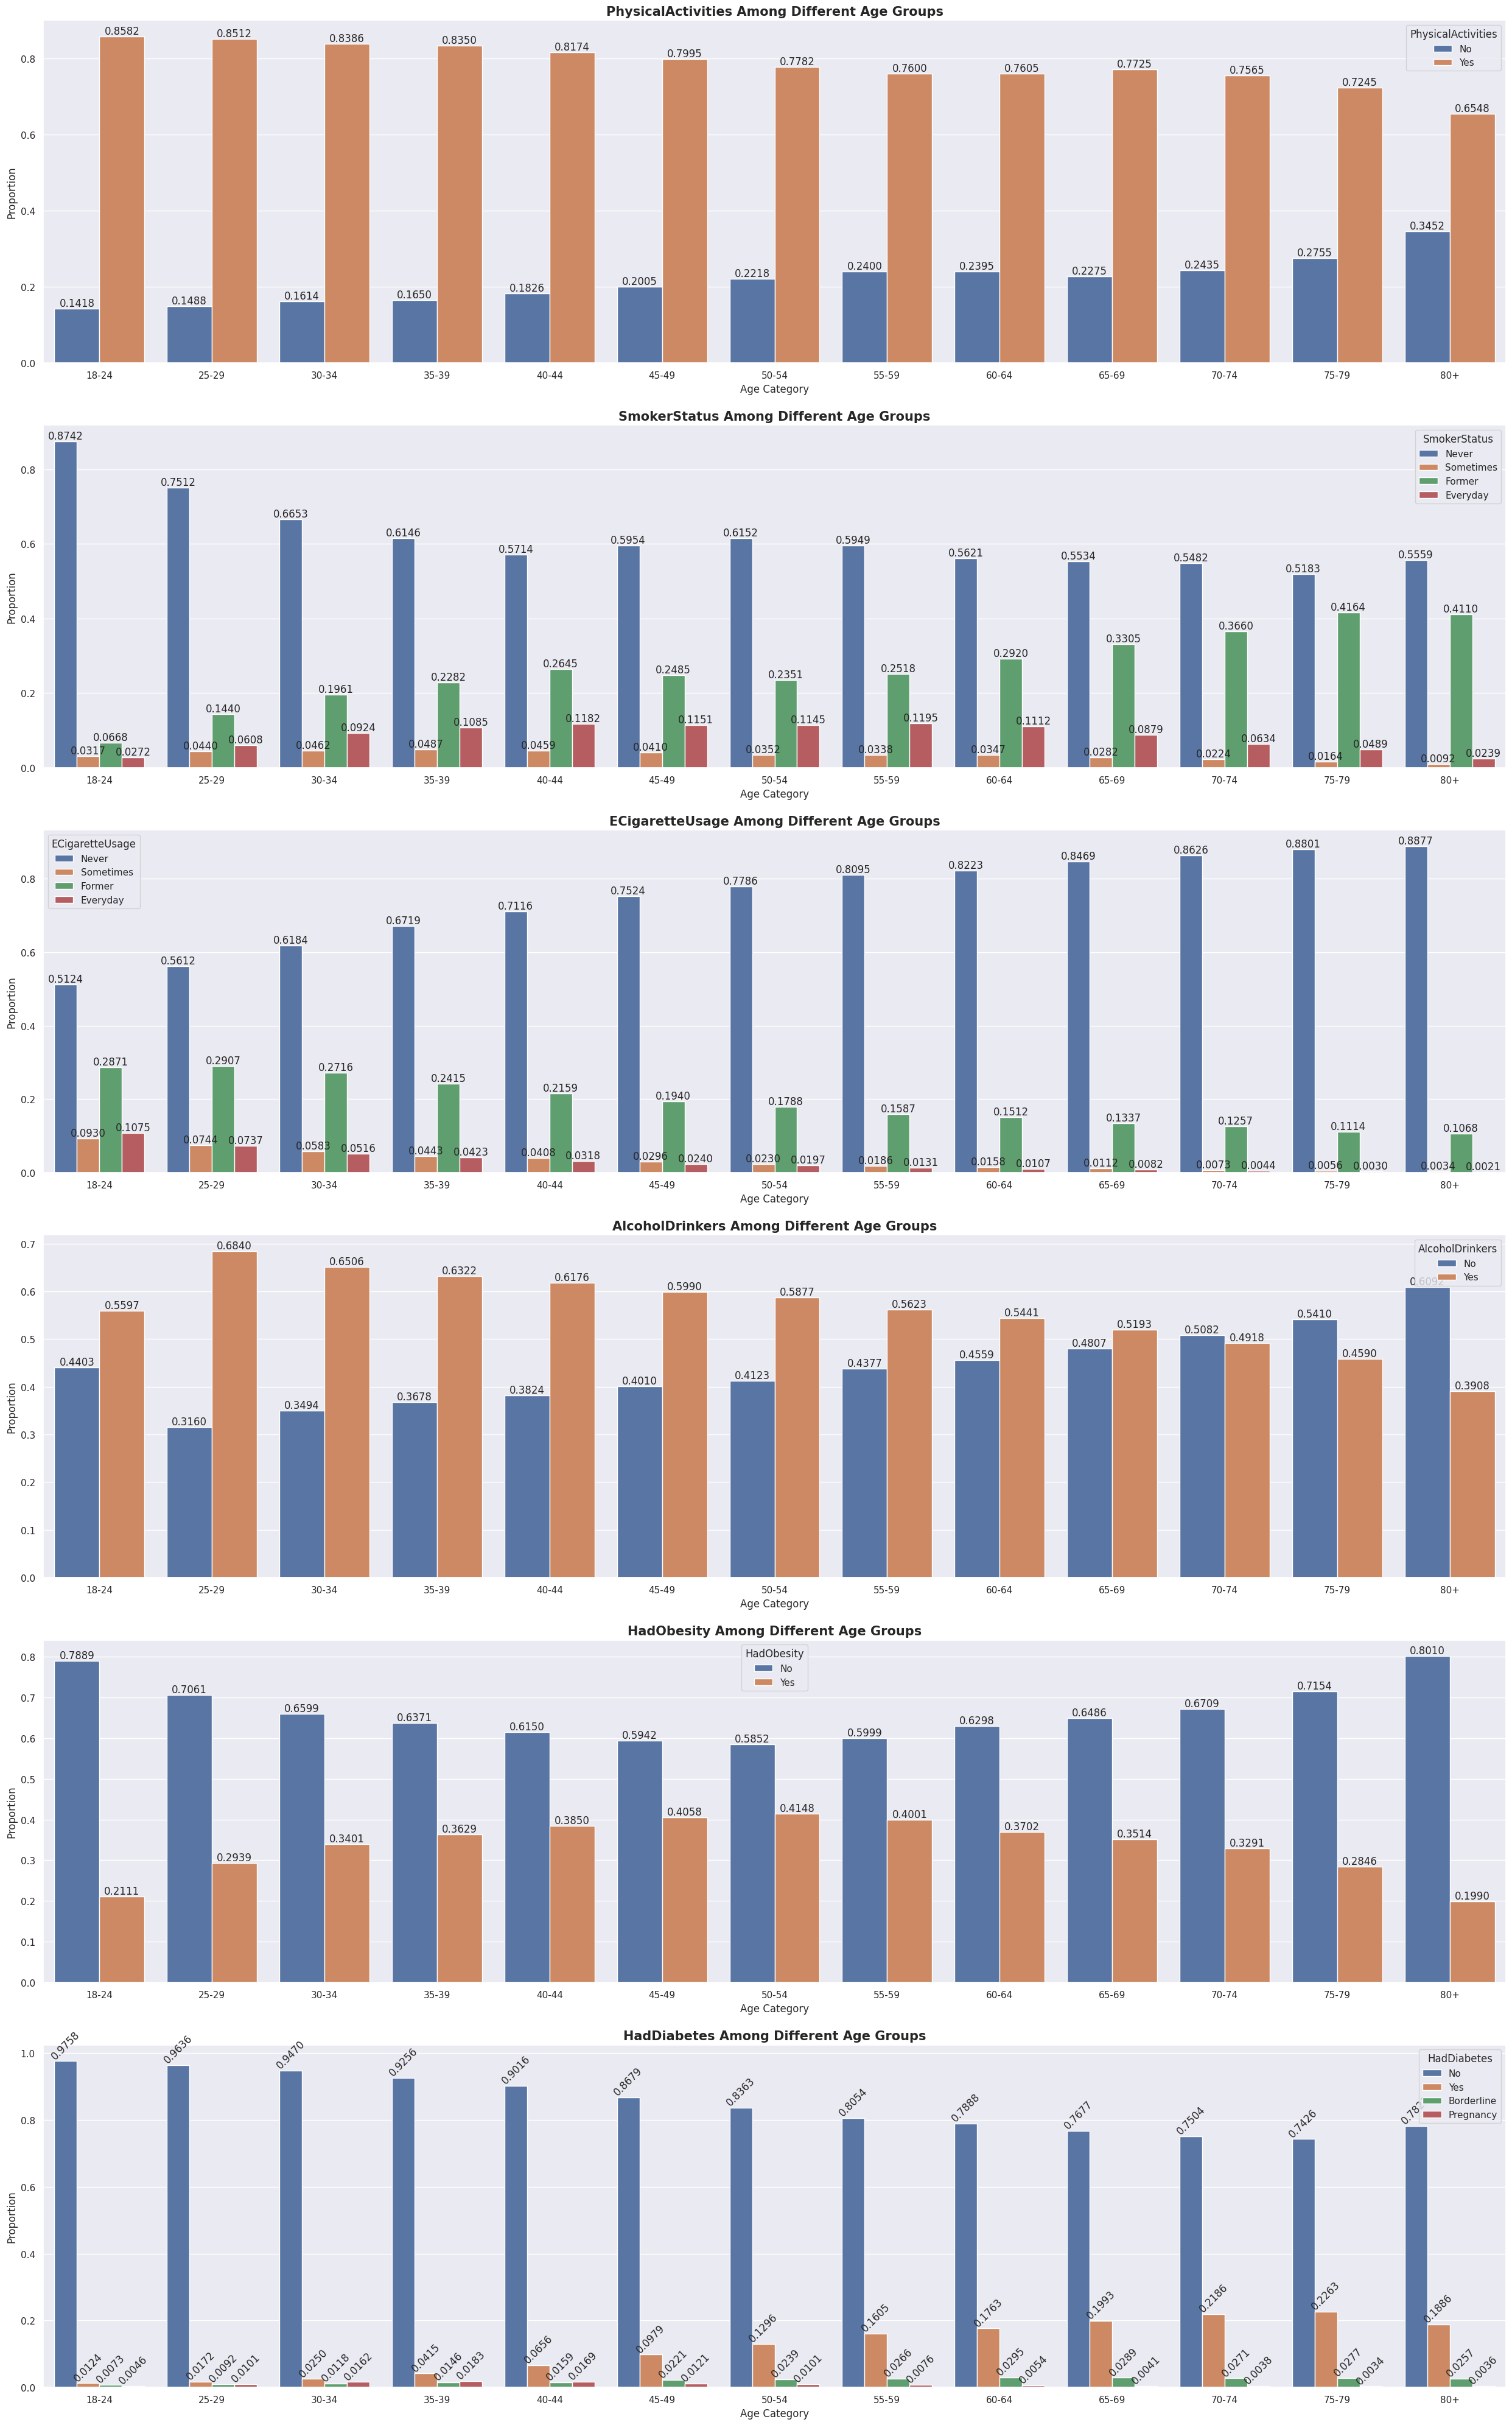

In [ ]:
df['PhysicalActivities'] = df['PhysicalActivities'].map({1: 'Yes', 0: 'No'})
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].map({1: 'Yes', 0: 'No'})
df['HadObesity'] = df['HadObesity'].map({1: 'Yes', 0: 'No'})
df['HadDiabetes'] = df['HadDiabetes'].map({1: 'Yes', 0: 'No', 'Borderline': 'Borderline', 'Pregnancy': 'Pregnancy'})

plt.figure(figsize=(25, 40))
sns.set(style='darkgrid')

risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'HadObesity', 'HadDiabetes']

categories_order = {
    'PhysicalActivities': ['No', 'Yes'],
    'AlcoholDrinkers': ['No', 'Yes'],
    'HadObesity': ['No', 'Yes'],
    'HadDiabetes': ['No', 'Yes', 'Borderline', 'Pregnancy'],
    'SmokerStatus': ['Never', 'Sometimes', 'Former', 'Everyday'],
    'ECigaretteUsage': ['Never', 'Sometimes', 'Former', 'Everyday']
}

for i, risk_factor in enumerate(risk_factors, 1):
    temp_df = df.groupby(['AgeCategory', risk_factor]).size().reset_index(name='counts')
    total_counts_df = df.groupby(['AgeCategory']).size().reset_index(name='total_counts')
    temp_df = pd.merge(temp_df, total_counts_df, on='AgeCategory')
    temp_df['proportion'] = temp_df['counts'] / temp_df['total_counts']
    temp_df[risk_factor] = pd.Categorical(temp_df[risk_factor], categories=categories_order[risk_factor], ordered=True)

    plt.subplot(6, 1, i)
    barplot = sns.barplot(data=temp_df, x='AgeCategory', y='proportion', hue=risk_factor, hue_order=categories_order[risk_factor])
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=15, weight='bold')
    plt.xlabel("Age Category")
    plt.ylabel("Proportion")

    if i != 6:
        for container in barplot.containers:
            barplot.bar_label(container, fmt='%.4f', label_type='edge')
    else:
        for container in barplot.containers:
            barplot.bar_label(container, fmt='%.4f', label_type='edge', rotation=45)
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])


plt.tight_layout()
plt.show()

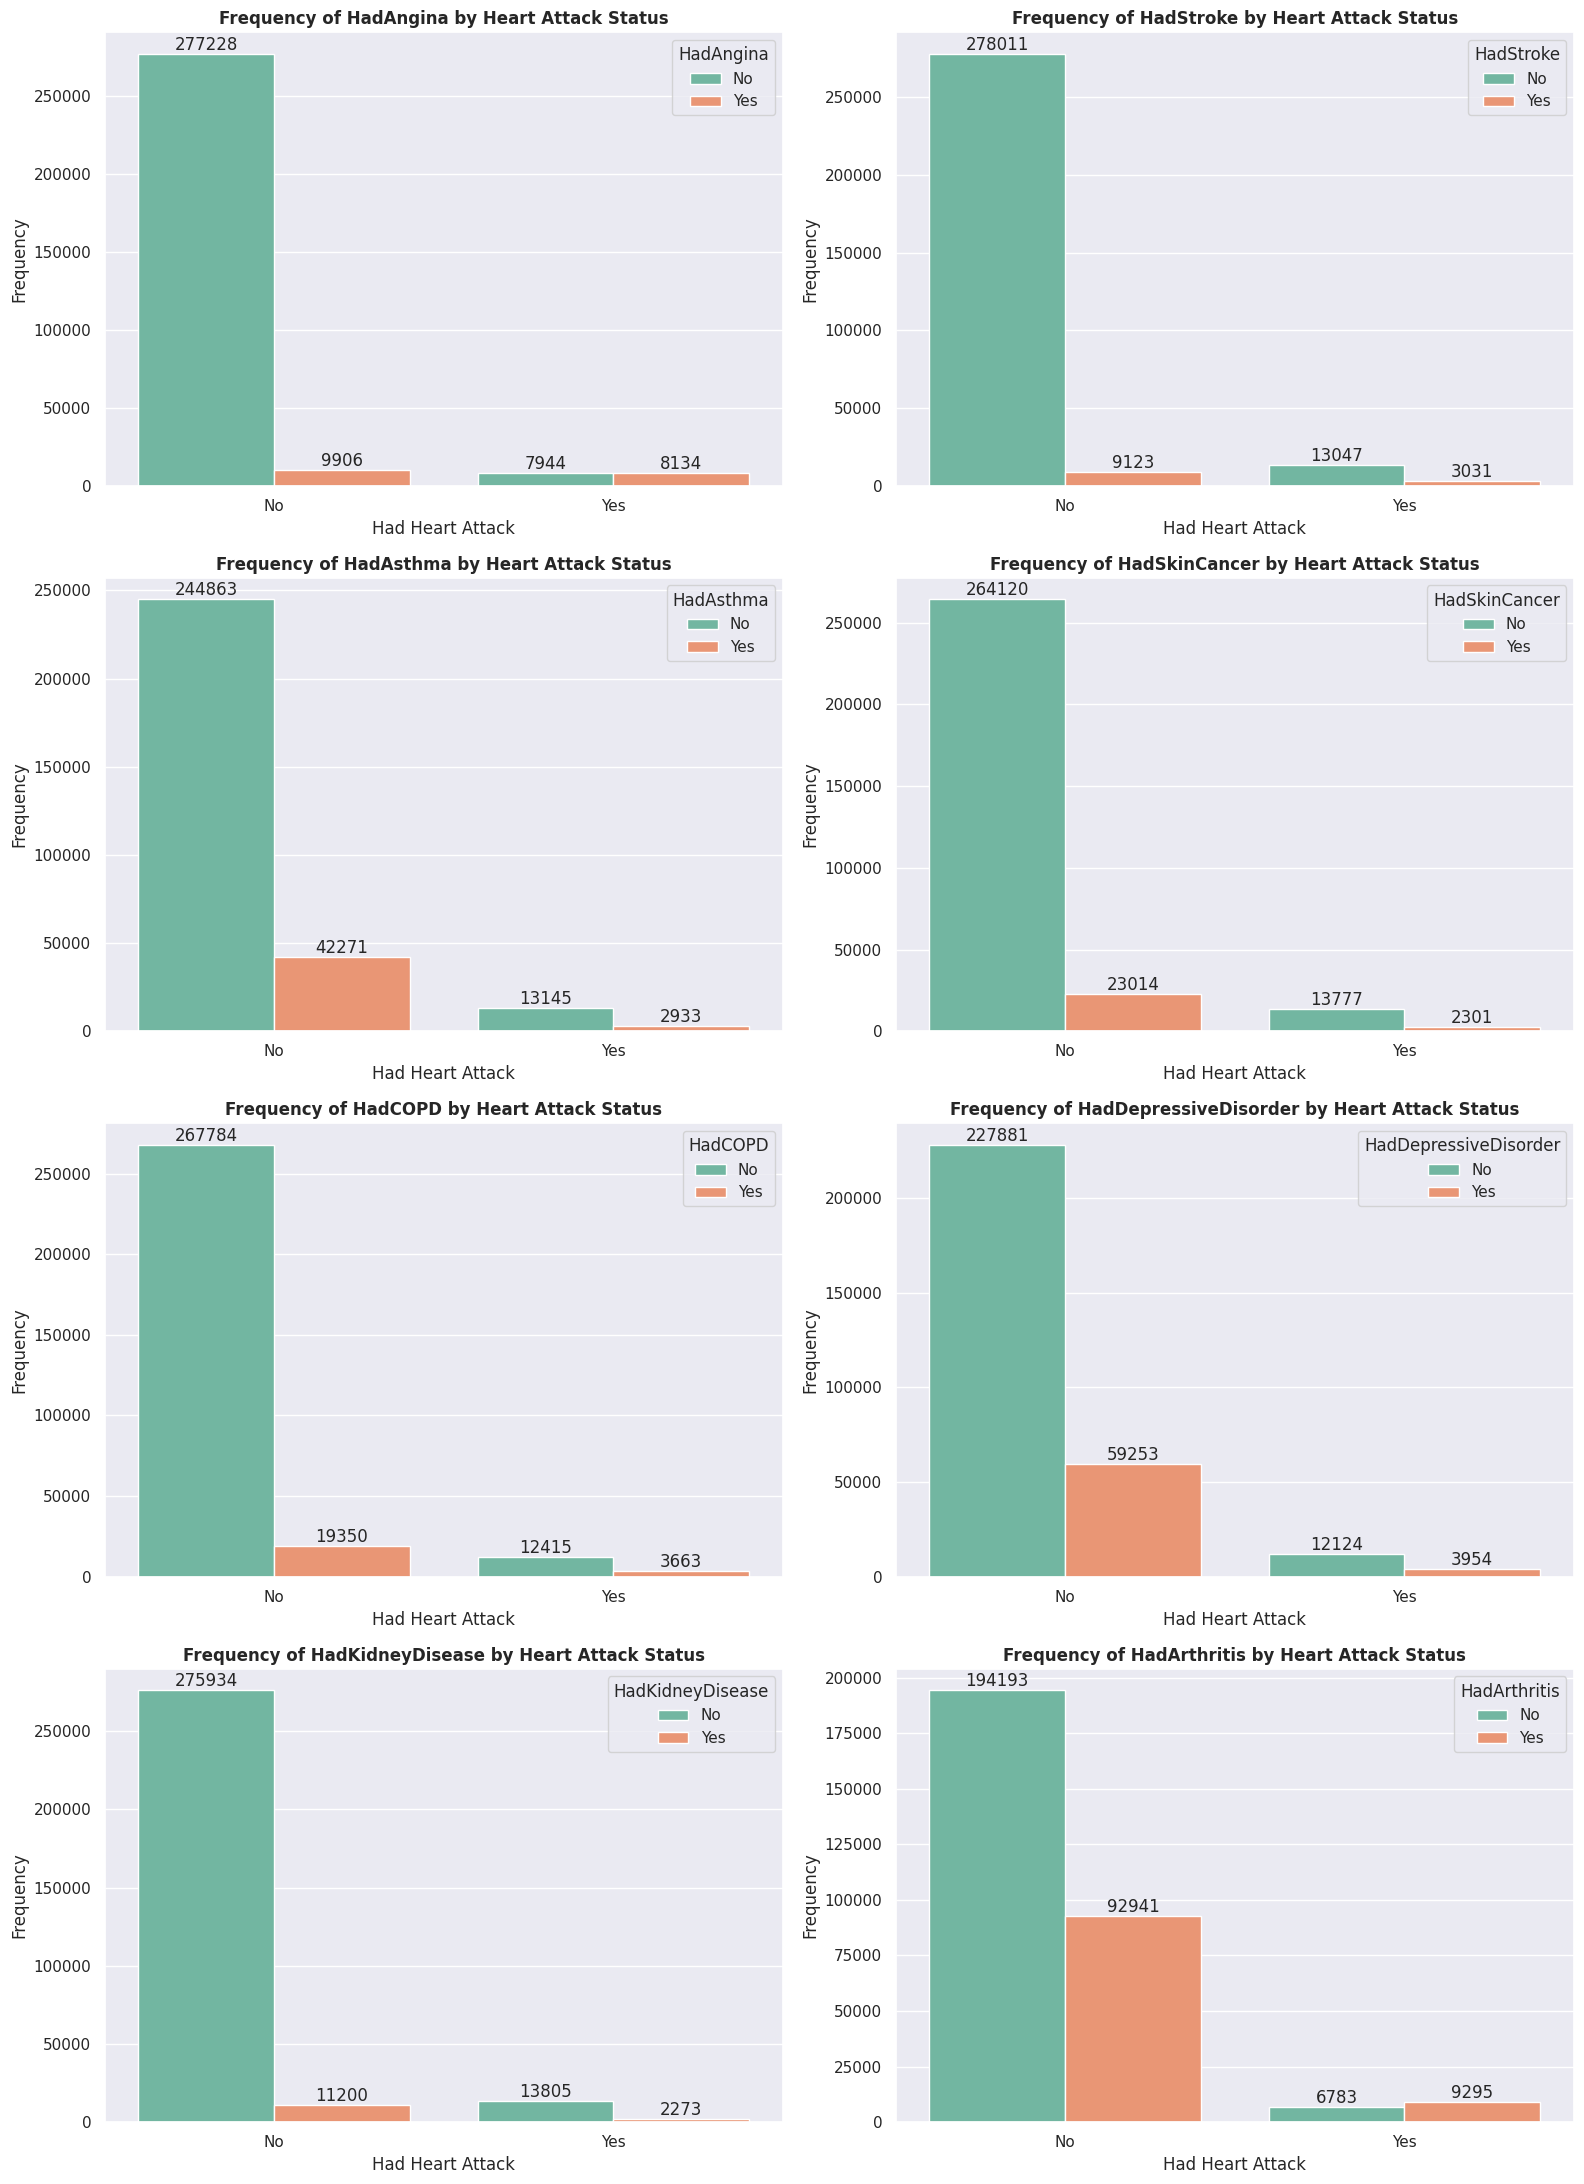

In [ ]:
conditions = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis']
for condition in conditions:
    df[condition] = df[condition].map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(16, 22))

conditions_to_plot = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis']

for i, condition in enumerate(conditions_to_plot, 1):
    ax = plt.subplot(4, 2, i)
    sns.countplot(x='HadHeartAttack', hue=condition, data=df, palette='Set2', hue_order=['No', 'Yes'])
    plt.title(f"Frequency of {condition} by Heart Attack Status", weight = 'bold')
    plt.xlabel("Had Heart Attack")
    plt.ylabel("Frequency")
    plt.legend(title=condition, loc='upper right')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

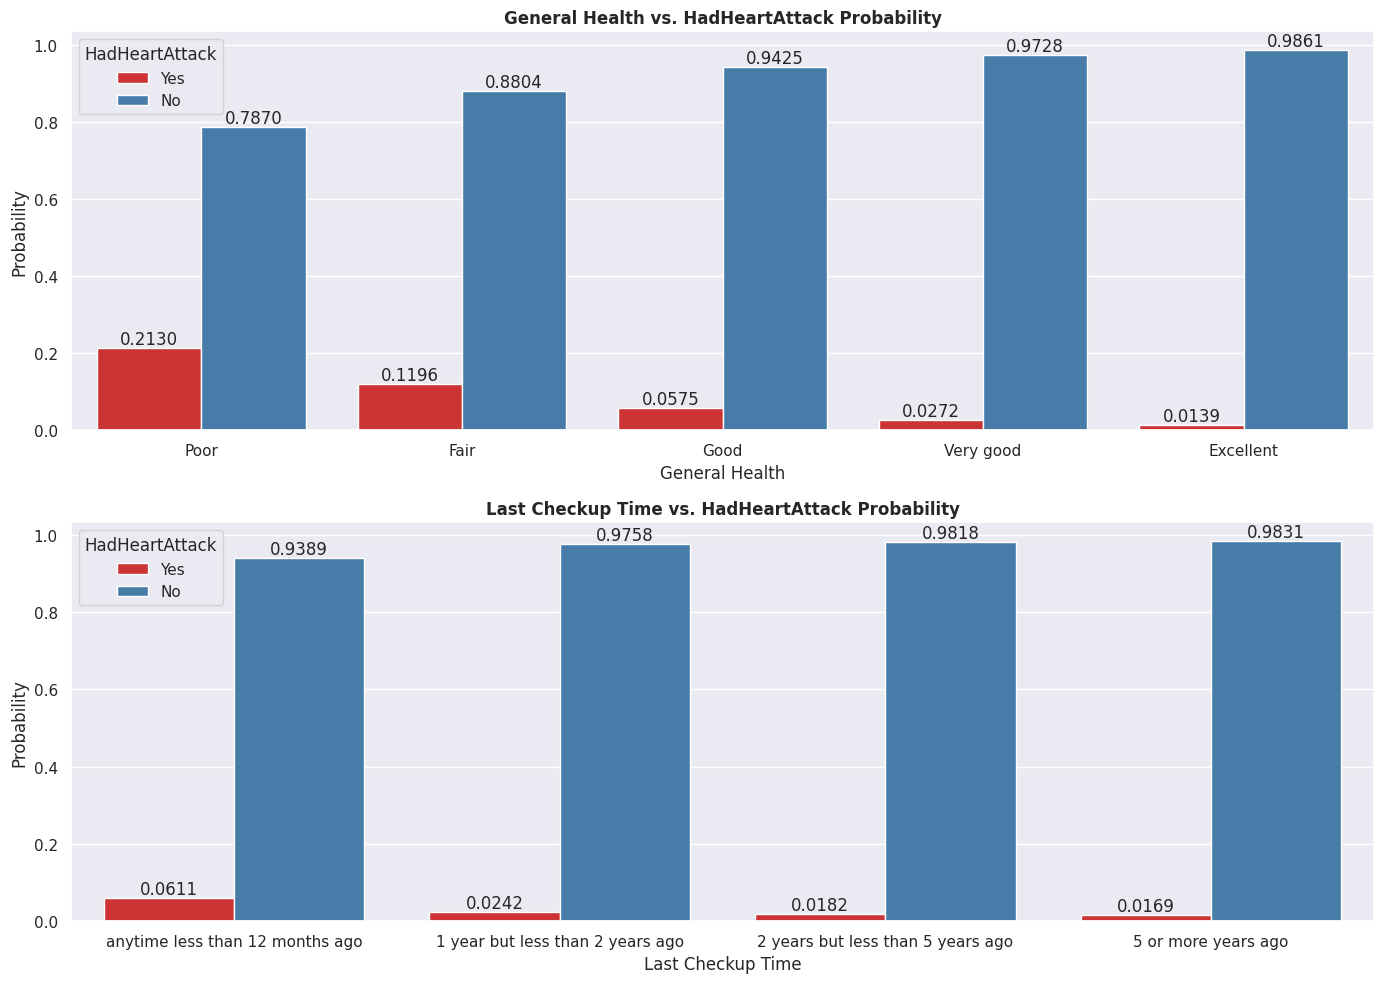

In [ ]:
general_health_mapping = {1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Very good', 5: 'Excellent'}
last_checkup_mapping = {
    '1': 'anytime less than 12 months ago',
    '1-2': '1 year but less than 2 years ago',
    '2-5': '2 years but less than 5 years ago',
    '5+': '5 or more years ago'
}

# Transforming 'GeneralHealth' to categorical data
df['GeneralHealth'] = df['GeneralHealth'].map(general_health_mapping)

# Transforming 'LastCheckupTime' to categorical data
df['LastCheckupTime'] = df['LastCheckupTime'].map(last_checkup_mapping)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plotting 'GeneralHealth' comparison
plt.subplot(2, 1, 1)
# Calculate proportions
gen_health_proportions = df.groupby('GeneralHealth')['HadHeartAttack'].value_counts(normalize=True).rename('proportion').reset_index()
ax1 = sns.barplot(x='GeneralHealth', y='proportion', hue='HadHeartAttack', data=gen_health_proportions, order=general_health_mapping.values(), hue_order=['Yes', 'No'], palette='Set1')
plt.title('General Health vs. HadHeartAttack Probability', weight='bold')
plt.xlabel('General Health')
plt.ylabel('Probability')
# Adding bar labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.4f')

# Plotting 'LastCheckupTime' comparison
plt.subplot(2, 1, 2)
# Calculate proportions
last_checkup_proportions = df.groupby('LastCheckupTime')['HadHeartAttack'].value_counts(normalize=True).rename('proportion').reset_index()
ax2 = sns.barplot(x='LastCheckupTime', y='proportion', hue='HadHeartAttack', data=last_checkup_proportions, order=last_checkup_mapping.values(), hue_order=['Yes', 'No'], palette='Set1')
plt.title('Last Checkup Time vs. HadHeartAttack Probability', weight='bold')
plt.xlabel('Last Checkup Time')
plt.ylabel('Probability')
# Adding bar labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns = ['LastCheckupTime', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'Sex'], inplace = True)
print(df.columns)
print(df.shape)

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'ChestScan', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos', 'HeartAttackStateLevel',
       'HadHeartAttack', 'Sex_Female', 'Sex_Male', 'LastCheckupTime_1',
       'LastCheckupTime_1-2', 'LastCheckupTime_2-5', 'LastCheckupTime_5+',
       'Diabetes_Borderline', 'Diabetes_No', 'Diabetes_Pregnancy',
       'Diabetes_Yes', 'Smoker_Everyday', 'Smoker_Former', 'Smoker_Never',
       'Smoker_Sometimes', 'Vape_Everyday', 'Vape_Former', 'Vape_Never',
       'Vape_Sometimes', 'Race_Black', 'Race_Hispanic', 'Race_Mixed',
       'Race_Other', 'Race

In [ ]:
df.replace({'Yes': 1, 'No': 0}, inplace = True)
df['GeneralHealth'].replace({'Poor' : 1,
                             'Fair' : 2,
                             'Good' : 3,
                             'Very good' : 4,
                             'Excellent' : 5}, inplace=True)
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
for col in df.describe(include='all').columns:
    print('Column Name: ',col)
    print(df[col].unique())

    print('------------------------------------------------------------------------')

Column Name:  GeneralHealth
[4 2 1 3 5]
------------------------------------------------------------------------
Column Name:  PhysicalHealthDays
[ 2.  1.  0.  5. 30.  4. 23. 14. 15.  3. 10.  7.  8. 25.  6. 21. 20. 29.
 16.  9. 27. 13. 12. 11. 28. 17. 24. 26. 18. 19. 22.]
------------------------------------------------------------------------
Column Name:  MentalHealthDays
[ 3.  0.  5. 20. 14. 10. 18.  1.  2. 15. 30.  4.  6.  7. 25.  8. 27. 21.
 13. 12. 28. 29. 26.  9. 22. 17. 11. 16. 24. 19. 23.]
------------------------------------------------------------------------
Column Name:  PhysicalActivities
[1 0]
------------------------------------------------------------------------
Column Name:  SleepHours
[ 5.  9.  7.  8.  6.  4. 10.  1. 18. 12.  3. 11.  2. 15. 13. 16. 14. 20.
 24. 23. 19. 17. 22.]
------------------------------------------------------------------------
Column Name:  HadAngina
[0 1]
------------------------------------------------------------------------
Column Name:  H

## Nominal Value Analysis (any outliers?)

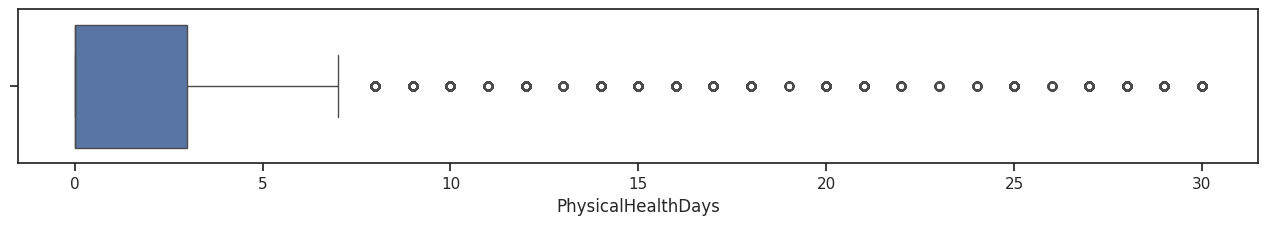

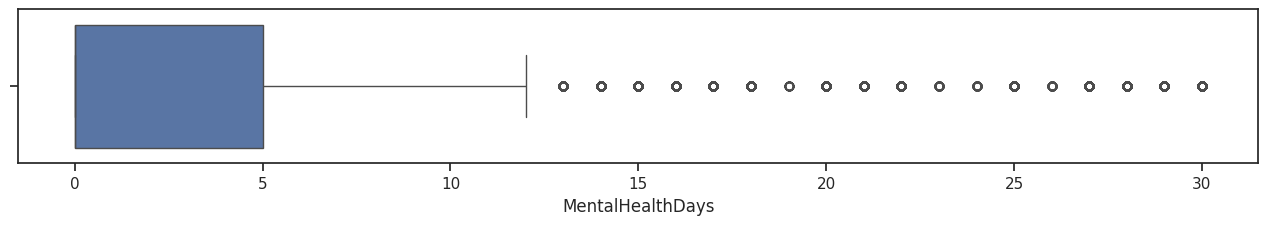

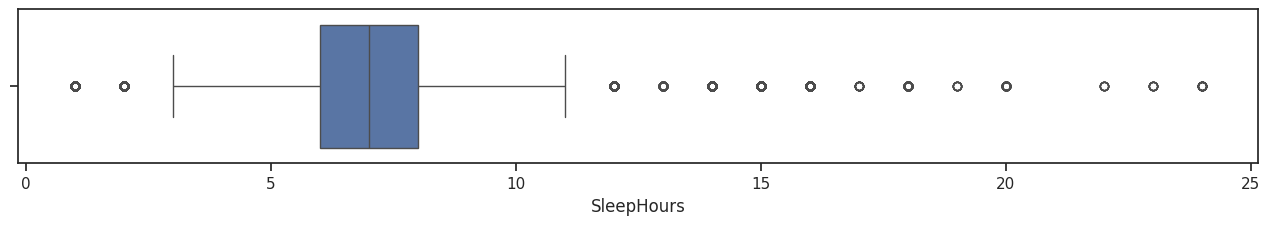

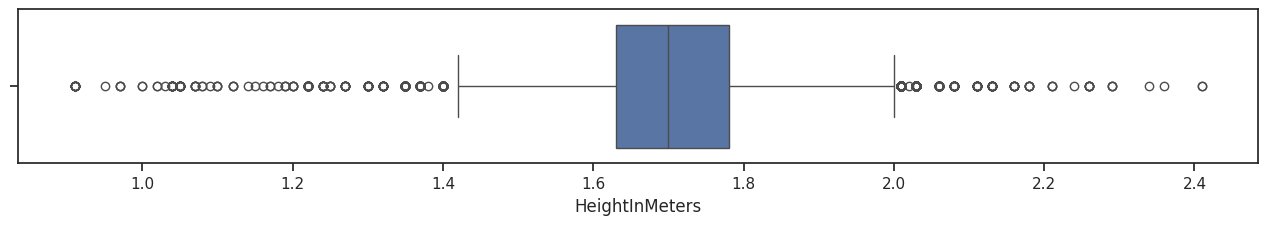

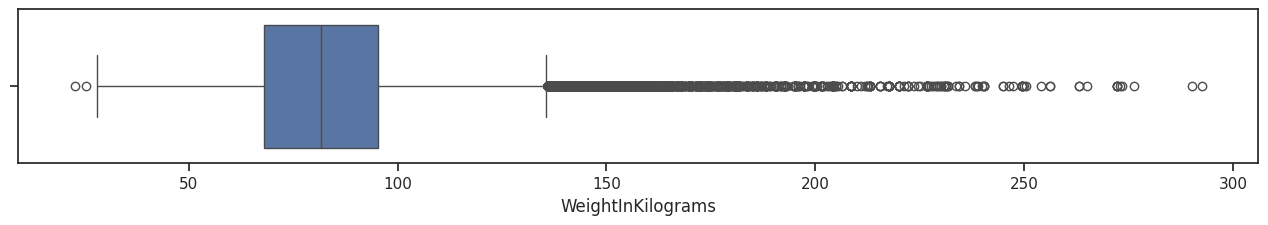

In [ ]:
for col in ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']:
    sns.set_style('ticks')
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df, x=col)
    plt.show()

In [ ]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [ ]:
sleep_hours_outliers, lower_sleep, upper_sleep = outliers(df, 'SleepHours')
print(f"Lower Limit:{lower_sleep} hours \nUpper Limit:{upper_sleep} hours")

Lower Limit:3.0 hours 
Upper Limit:11.0 hours


In [ ]:
height_outliers, lower_height, upper_height = outliers(df, 'HeightInMeters')
print(f"Lower Limit:{round(lower_height,3)}m\nUpper Limit:{round(upper_height,3)}m")

Lower Limit:1.405m
Upper Limit:2.005m


In [ ]:
weight_outliers, lower_weight, upper_weight = outliers(df, 'WeightInKilograms')
print(f"Lower Limit:{round(lower_weight,3)} kg \nUpper Limit:{round(upper_weight,3)} kg")

Lower Limit:27.225 kg 
Upper Limit:136.065 kg


# Fitting Models

In [ ]:
# df.head(1000).to_excel('output_sample.xlsx', index=False)
df.columns

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'ChestScan', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos', 'HeartAttackStateLevel',
       'HadHeartAttack', 'Sex_Female', 'Sex_Male', 'LastCheckupTime_1',
       'LastCheckupTime_1-2', 'LastCheckupTime_2-5', 'LastCheckupTime_5+',
       'Diabetes_Borderline', 'Diabetes_No', 'Diabetes_Pregnancy',
       'Diabetes_Yes', 'Smoker_Everyday', 'Smoker_Former', 'Smoker_Never',
       'Smoker_Sometimes', 'Vape_Everyday', 'Vape_Former', 'Vape_Never',
       'Vape_Sometimes', 'Race_Black', 'Race_Hispanic', 'Race_Mixed',
       'Race_Other', 'Race

In [ ]:
df[0:10]

GeneralHealth  PhysicalHealthDays  MentalHealthDays  PhysicalActivities  \
2               4                 2.0               3.0                   1   
4               2                 2.0               0.0                   1   
5               1                 1.0               0.0                   0   
6               4                 0.0               0.0                   1   
7               3                 0.0               0.0                   0   
11              3                 0.0               0.0                   0   
12              2                 5.0               0.0                   0   
13              4                 0.0               0.0                   1   
14              3                30.0               5.0                   1   
18              1                 0.0               0.0                   1   

    SleepHours  HadAngina  HadStroke  HadAsthma  HadSkinCancer  HadCOPD  ...  \
2          5.0          0          0          0              1        0  ...   
4          9.0          0          0          0              0        0  ...   
5          7.0          0          1          0              0        0  ...   
6          7.0          0          0          0              0        0  ...   
7          8.0          0          0          0              0        0  ...   
11         6.0          0          0          0              0        0  ...   
12         6.0          0          0          1              0        0  ...   
13         8.0          0          0          0              0        0  ...   
14         8.0          0          0          0              1        0  ...   
18         4.0          0          1          0              0        0  ...   

    Vape_Everyday  Vape_Former  Vape_Never  Vape_Sometimes  Race_Black  \
2               0            0           1               0           0   
4               0            0           1               0           0   
5               0            0           1               0           0   
6               0            0           1               0           1   
7               0            0           1               0           0   
11              0            0           1               0           0   
12              0            0           1               0           1   
13              0            0           1               0           0   
14              0            0           1               0           0   
18              0            0           1               0           0   

    Race_Hispanic  Race_Mixed  Race_Other  Race_White  HadObesity  
2               0           0           0           1           0  
4               0           0           0           1           0  
5               0           0           0           1           0  
6               0           0           0           0           0  
7               0           0           0           1           0  
11              0           0           0           1           0  
12              0           0           0           0           0  
13              0           0           0           1           1  
14              0           0           0           1           0  
18              0           0           0           1           0  

[10 rows x 51 columns]

In [ ]:
# Transfer BMI:
######Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 0
    elif value>=17 and value<18.5:
        return 1
    elif value>=18.5 and value<25:
        return 1
    elif value>=25 and value<30:
        return 2
    elif value>=30 and value<35:
        return 3
    elif value>=35 and value<40:
        return 3
    elif value>=40 :
        return 4


df["BMI_cat"] = df["BMI"].apply(transform_bmi)
df["BMI_cat"].value_counts(ascending= False)

BMI_cat
2    107281
1     91793
3     85468
4     17238
0      1432
Name: count, dtype: int64

In [ ]:
# One hot encoding:
df_one_hot = pd.get_dummies(df, columns=['BMI_cat'], prefix='BMI_cat')

# Now 'df_one_hot' contains the original data plus the one-hot encoded BMI categories
print(df_one_hot.columns)

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'ChestScan', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos', 'HeartAttackStateLevel',
       'HadHeartAttack', 'Sex_Female', 'Sex_Male', 'LastCheckupTime_1',
       'LastCheckupTime_1-2', 'LastCheckupTime_2-5', 'LastCheckupTime_5+',
       'Diabetes_Borderline', 'Diabetes_No', 'Diabetes_Pregnancy',
       'Diabetes_Yes', 'Smoker_Everyday', 'Smoker_Former', 'Smoker_Never',
       'Smoker_Sometimes', 'Vape_Everyday', 'Vape_Former', 'Vape_Never',
       'Vape_Sometimes', 'Race_Black', 'Race_Hispanic', 'Race_Mixed',
       'Race_Other', 'Race

In [ ]:
# Transfer sleep hours:
######Function used to transform BMI Values to categories
def transform_sleep(value):
    if value<7:
        return 0
    elif value>=7 and value<10:
        return 1
    elif value>=10 :
        return 2


df_one_hot["SleepHours_cat"] = df_one_hot["SleepHours"].apply(transform_sleep)
df_one_hot["SleepHours_cat"].value_counts(ascending= False)

SleepHours_cat
1    195657
0     97749
2      9806
Name: count, dtype: int64

In [ ]:
# One hot encoding:
df_one_hot = pd.get_dummies(df_one_hot, columns=['SleepHours_cat'], prefix='SleepHours_cat')

# Now 'df_one_hot' contains the original data plus the one-hot encoded BMI categories
print(df_one_hot.columns)

Index(['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'ChestScan', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'CovidPos', 'HeartAttackStateLevel',
       'HadHeartAttack', 'Sex_Female', 'Sex_Male', 'LastCheckupTime_1',
       'LastCheckupTime_1-2', 'LastCheckupTime_2-5', 'LastCheckupTime_5+',
       'Diabetes_Borderline', 'Diabetes_No', 'Diabetes_Pregnancy',
       'Diabetes_Yes', 'Smoker_Everyday', 'Smoker_Former', 'Smoker_Never',
       'Smoker_Sometimes', 'Vape_Everyday', 'Vape_Former', 'Vape_Never',
       'Vape_Sometimes', 'Race_Black', 'Race_Hispanic', 'Race_Mixed',
       'Race_Other', 'Race

In [ ]:
df_one_hot

GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
2                   4                 2.0               3.0   
4                   2                 2.0               0.0   
5                   1                 1.0               0.0   
6                   4                 0.0               0.0   
7                   3                 0.0               0.0   
...               ...                 ...               ...   
442058              2                 0.0               7.0   
442059              3                 0.0              15.0   
442061              3                 0.0               0.0   
442063              5                 2.0               2.0   
442065              4                 0.0               0.0   

        PhysicalActivities  SleepHours  HadAngina  HadStroke  HadAsthma  \
2                        1         5.0          0          0          0   
4                        1         9.0          0          0          0   
5                        0         7.0          0          1          0   
6                        1         7.0          0          0          0   
7                        0         8.0          0          0          0   
...                    ...         ...        ...        ...        ...   
442058                   1         7.0          0          0          0   
442059                   1         7.0          0          1          0   
442061                   1         8.0          0          0          0   
442063                   1         7.0          0          0          0   
442065                   0         5.0          0          0          1   

        HadSkinCancer  HadCOPD  ...  Race_White  HadObesity  BMI_cat_0  \
2                   1        0  ...           1           0      False   
4                   0        0  ...           1           0      False   
5                   0        0  ...           1           0      False   
6                   0        0  ...           0           0      False   
7                   0        0  ...           1           0      False   
...               ...      ...  ...         ...         ...        ...   
442058              0        0  ...           0           0      False   
442059              0        0  ...           0           0      False   
442061              0        0  ...           1           1      False   
442063              0        0  ...           0           0      False   
442065              0        0  ...           0           1      False   

        BMI_cat_1  BMI_cat_2  BMI_cat_3  BMI_cat_4  SleepHours_cat_0  \
2           False       True      False      False              True   
4            True      False      False      False             False   
5           False       True      False      False             False   
6            True      False      False      False             False   
7           False       True      False      False             False   
...           ...        ...        ...        ...               ...   
442058       True      False      False      False             False   
442059      False       True      False      False             False   
442061      False      False       True      False             False   
442063      False       True      False      False             False   
442065      False      False       True      False              True   

        SleepHours_cat_1  SleepHours_cat_2  
2                  False             False  
4                   True             False  
5                   True             False  
6                   True             False  
7                   True             False  
...                  ...               ...  
442058              True             False  
442059              True             False  
442061              True             False  
442063              True             False  
442065             False             False  

[303212 rows x 59 columns]

### First examine the correlation between variables

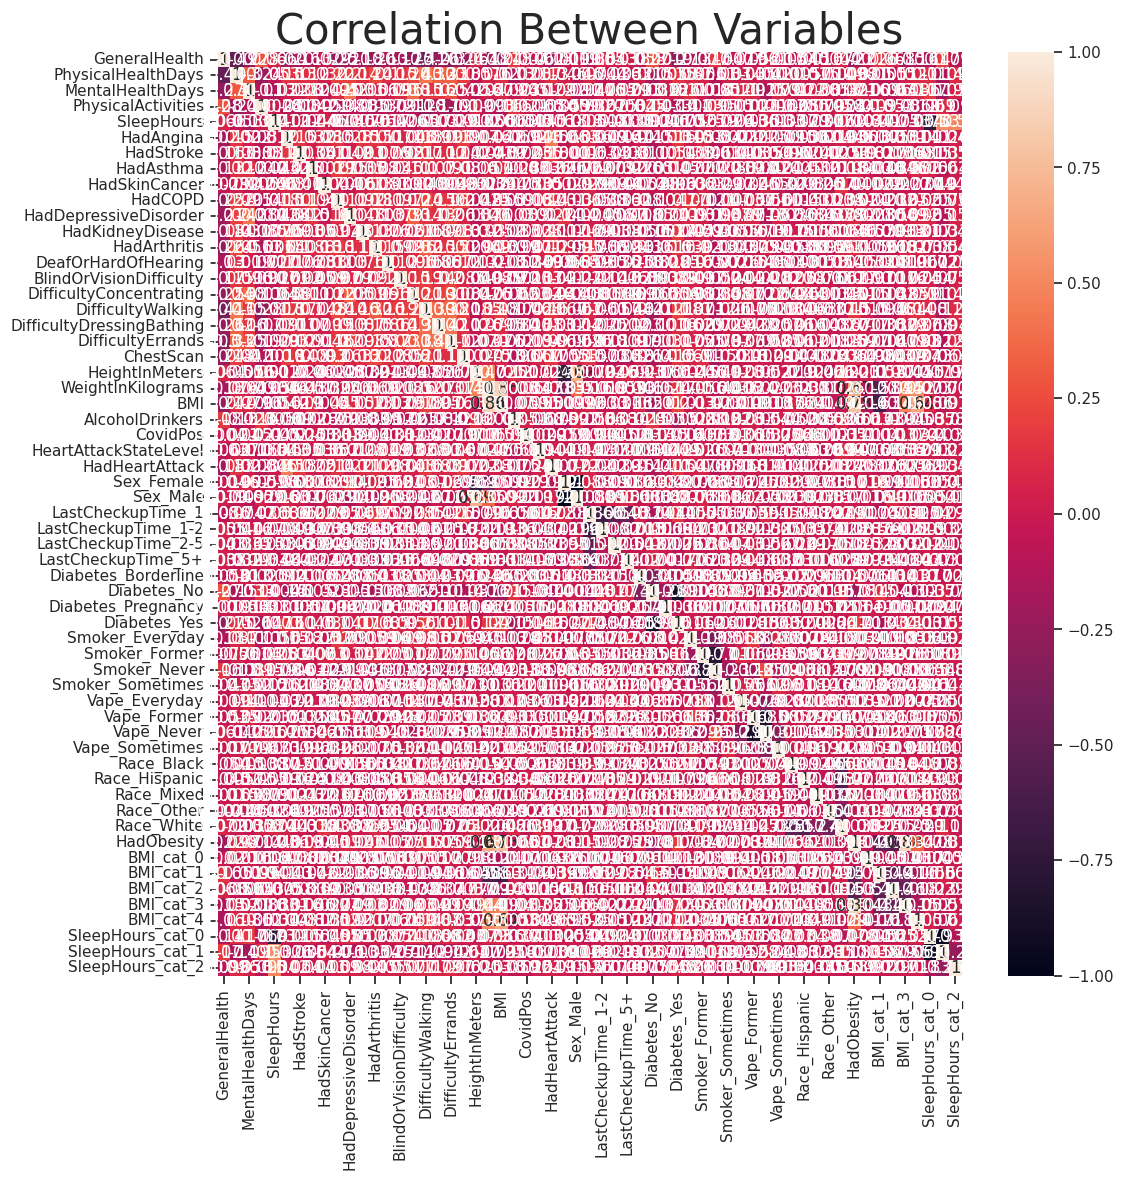

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_one_hot.corr(), annot = True)
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

#This is the correlation between all variables after one-hot encoding.

In [ ]:
gt_one = df_one_hot > 1
columns_with_gt_one = gt_one.any()
columns_names = columns_with_gt_one[columns_with_gt_one].index.tolist()
print("Columns with values greater than 1:", columns_names)

Columns with values greater than 1: ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'HeartAttackStateLevel']


In [ ]:
# Drop non-numeric and redundant columns
# 这里解释一下为什么不能直接当numerical predictor，因为对于很多数据来说，不是线性关系
# Since BMI is a function of height and weight, we'll use only BMI and drop 'HeightInMeters' and 'WeightInKilograms'
features_df = df_one_hot.drop(columns=["BMI", "SleepHours", 'HeightInMeters', 'WeightInKilograms'])

X = features_df.drop('HadHeartAttack', axis=1)
y = features_df['HadHeartAttack']

# Addressing the multicollinearity problem:

# 1. Dropping one of each set of dummy variables to avoid the dummy variable trap
# BMI_cat_1和SleepHours_cat_1是因为1是比较正常的情况。
columns_to_drop = ['Sex_Male', 'LastCheckupTime_1', 'Diabetes_No', 'Smoker_Never', 'Vape_Never', 'Race_White', "BMI_cat_1", "SleepHours_cat_1", "HadObesity"]


X_complete = X.drop(columns=columns_to_drop)

In [ ]:
# 这里中插一个random forest 来看model importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=200,max_depth = 20, min_samples_split = 10, min_samples_leaf = 4,
                                       random_state=42)

rf_classifier.fit(X_complete, y)

importances = rf_classifier.feature_importances_
feature_importance = sorted(zip(importances, X.columns), reverse=True)
print("Feature importances:", feature_importance)


Feature importances: [(0.4116605732508705, 'HadAngina'), (0.05041079081196786, 'GeneralHealth'), (0.04527633400084259, 'PhysicalHealthDays'), (0.04295607907439617, 'HadStroke'), (0.035060966584250536, 'ChestScan'), (0.034447722079640586, 'MentalHealthDays'), (0.03409400277343742, 'HeartAttackStateLevel'), (0.02503034447387534, 'Diabetes_Borderline'), (0.023944335083063296, 'Sex_Female'), (0.02287913851350482, 'DifficultyWalking'), (0.018176347101161294, 'HadCOPD'), (0.015825104839956795, 'HadArthritis'), (0.015010439563395815, 'Diabetes_Pregnancy'), (0.014251692792654251, 'Race_Other'), (0.013783045920923992, 'AlcoholDrinkers'), (0.013699332656582719, 'PhysicalActivities'), (0.013382772193588204, 'Race_Black'), (0.0130522001982595, 'DeafOrHardOfHearing'), (0.012823238931459336, 'CovidPos'), (0.012786823734596935, 'Race_Hispanic'), (0.012154974472966288, 'HadKidneyDisease'), (0.010901605763055018, 'HadDepressiveDisorder'), (0.010279877030822171, 'Smoker_Former'), (0.010156782339094027, 

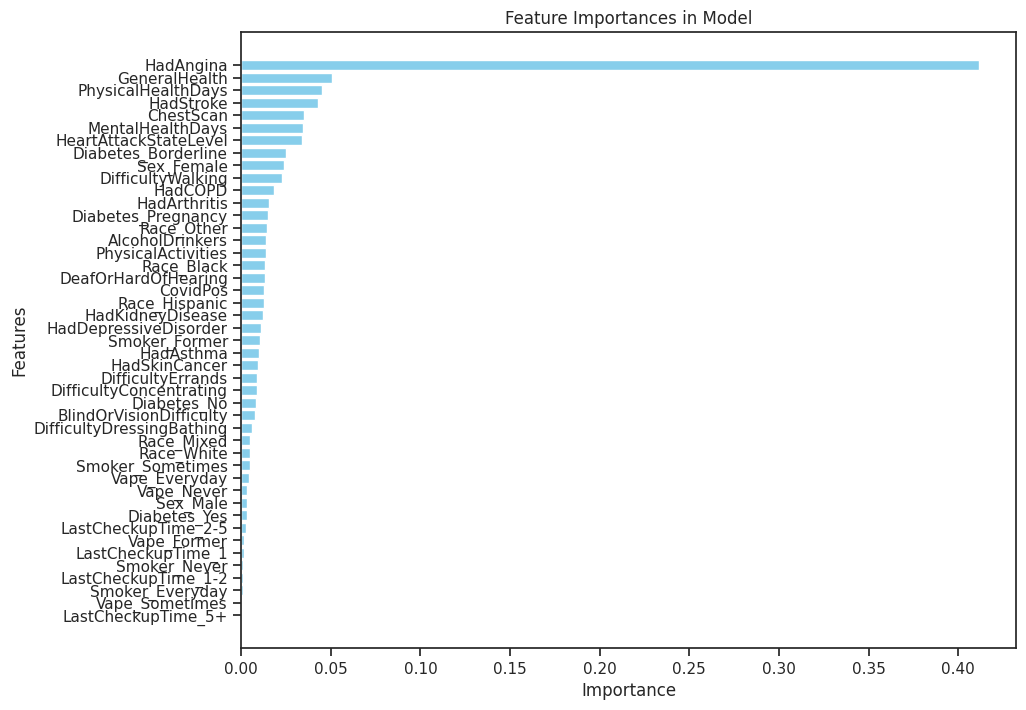

In [ ]:
import matplotlib.pyplot as plt

# Feature importances from the model
features = [
    (0.4116605732508705, 'HadAngina'), (0.05041079081196786, 'GeneralHealth'),
    (0.04527633400084259, 'PhysicalHealthDays'), (0.04295607907439617, 'HadStroke'),
    (0.035060966584250536, 'ChestScan'), (0.034447722079640586, 'MentalHealthDays'),
    (0.03409400277343742, 'HeartAttackStateLevel'), (0.02503034447387534, 'Diabetes_Borderline'),
    (0.023944335083063296, 'Sex_Female'), (0.02287913851350482, 'DifficultyWalking'),
    (0.018176347101161294, 'HadCOPD'), (0.015825104839956795, 'HadArthritis'),
    (0.015010439563395815, 'Diabetes_Pregnancy'), (0.014251692792654251, 'Race_Other'),
    (0.013783045920923992, 'AlcoholDrinkers'), (0.013699332656582719, 'PhysicalActivities'),
    (0.013382772193588204, 'Race_Black'), (0.0130522001982595, 'DeafOrHardOfHearing'),
    (0.012823238931459336, 'CovidPos'), (0.012786823734596935, 'Race_Hispanic'),
    (0.012154974472966288, 'HadKidneyDisease'), (0.010901605763055018, 'HadDepressiveDisorder'),
    (0.010279877030822171, 'Smoker_Former'), (0.010156782339094027, 'HadAsthma'),
    (0.009151066020016231, 'HadSkinCancer'), (0.009009294984961808, 'DifficultyErrands'),
    (0.008872903184297325, 'DifficultyConcentrating'), (0.00833484320395616, 'Diabetes_No'),
    (0.0077746176936682775, 'BlindOrVisionDifficulty'), (0.006212964942624125, 'DifficultyDressingBathing'),
    (0.005187251613604168, 'Race_Mixed'), (0.004999361039366667, 'Race_White'),
    (0.0048176864388784265, 'Smoker_Sometimes'), (0.004576413619287621, 'Vape_Everyday'),
    (0.003240425201067379, 'Vape_Never'), (0.0030677479645917155, 'Sex_Male'),
    (0.0030598065459189827, 'Diabetes_Yes'), (0.0024475364891519127, 'LastCheckupTime_2-5'),
    (0.001761926162107519, 'Vape_Former'), (0.0014054318660260473, 'LastCheckupTime_1'),
    (0.0012951504982246914, 'Smoker_Never'), (0.001029790052153468, 'LastCheckupTime_1-2'),
    (0.001006287903703821, 'Smoker_Everyday'), (0.0004267778162575301, 'Vape_Sometimes'),
    (0.0002781925757706009, 'LastCheckupTime_5+')
]

importances, labels = zip(*features)

plt.figure(figsize=(10, 8))
plt.barh(labels, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Model')
plt.gca().invert_yaxis() 
plt.show()


In [ ]:
# Check VIF to see if there exists multicolinearlity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # Calculating VIF requires the data to contain only numeric features
    # Therefore, we'll drop any non-numeric features if they exist
    df_numeric = df.select_dtypes(include=[np.number])
    # Adding a constant column for intercept，这个不应该加！
    # df_numeric = sm.add_constant(df_numeric)

    vif_data = pd.DataFrame()
    vif_data['Feature'] = df_numeric.columns

    # Calculating VIF for each feature
    vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
    return vif_data

vif_df = calculate_vif(X_complete.head(5000))

vif_df[vif_df['VIF'] > 10]

Feature        VIF
0           GeneralHealth  16.822472
21  HeartAttackStateLevel  28.578636

The Variance Inflation Factor (VIF) analysis reveals that there is indeed a multicollinearity problem within the dataset. Variables with VIF values of infinity suggest perfect multicollinearity, which usually happens when dummy variables are included without dropping one category to avoid the dummy variable trap or when variables are perfectly correlated with each other.

Here are some specific points and actions we can take:

1. Height, Weight, and BMI: These three features are likely highly correlated. Since BMI is a function of height and weight, we should consider using only one of these in the model to prevent multicollinearity.
2. One-Hot Encoded Variables: It seems there are one-hot encoded variables for each category without dropping one reference category (as indicated by the infinite VIF values). We should drop one dummy variable for each original categorical variable to avoid perfect multicollinearity.

In [ ]:
# 可以对于这两个比较相互关联的variable进行PCA，然后抽取一个主成分
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

variables_of_interest = ['GeneralHealth', 'HeartAttackStateLevel']
X_selected = X_complete[variables_of_interest]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

X_complete.drop(columns=variables_of_interest, inplace=True)
X_complete['PC1'] = principal_components[:, 0]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_complete[['PC1']] = scaler.fit_transform(X_complete[['PC1']])


In [ ]:
# 太好了现在解决了VIF的问题
vif_df = calculate_vif(X_complete.head(5000))
vif_df[vif_df['VIF'] > 10]

Empty DataFrame
Columns: [Feature, VIF]
Index: []

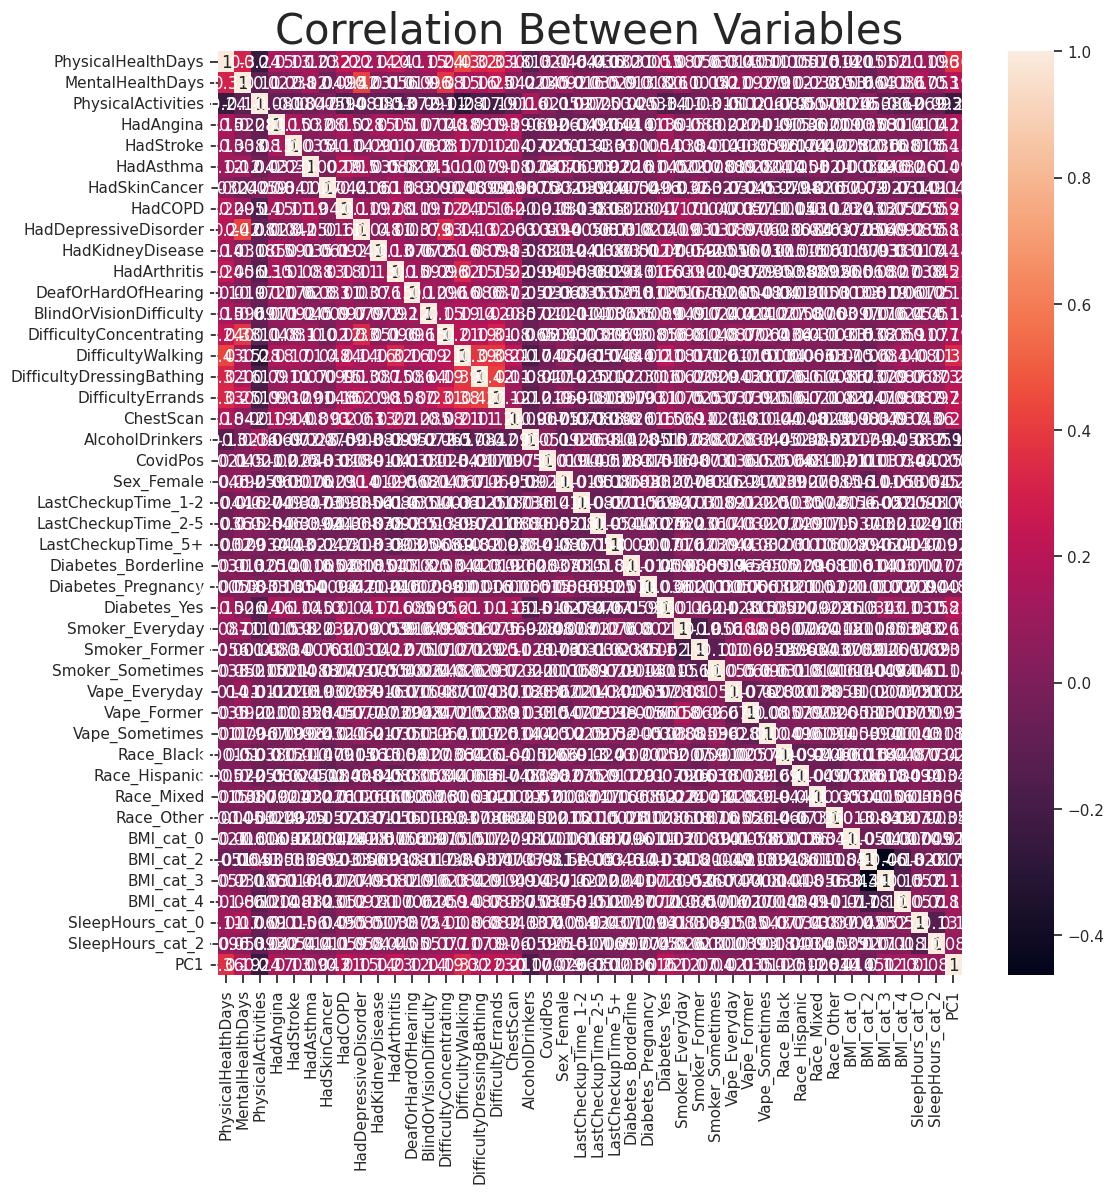

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(X_complete.corr(), annot = True)
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

## Linear Regression Model

In [ ]:
# Checking unique values for non-numeric and non-binary variables to decide on encoding
X_complete

PhysicalHealthDays  MentalHealthDays  PhysicalActivities  HadAngina  \
2                      2.0               3.0                   1          0   
4                      2.0               0.0                   1          0   
5                      1.0               0.0                   0          0   
6                      0.0               0.0                   1          0   
7                      0.0               0.0                   0          0   
...                    ...               ...                 ...        ...   
442058                 0.0               7.0                   1          0   
442059                 0.0              15.0                   1          0   
442061                 0.0               0.0                   1          0   
442063                 2.0               2.0                   1          0   
442065                 0.0               0.0                   0          0   

        HadStroke  HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
2               0          0              1        0                      0   
4               0          0              0        0                      0   
5               1          0              0        0                      0   
6               0          0              0        0                      0   
7               0          0              0        0                      0   
...           ...        ...            ...      ...                    ...   
442058          0          0              0        0                      1   
442059          1          0              0        0                      0   
442061          0          0              0        0                      0   
442063          0          0              0        0                      0   
442065          0          1              0        0                      0   

        HadKidneyDisease  ...  Race_Hispanic  Race_Mixed  Race_Other  \
2                      0  ...              0           0           0   
4                      0  ...              0           0           0   
5                      0  ...              0           0           0   
6                      0  ...              0           0           0   
7                      0  ...              0           0           0   
...                  ...  ...            ...         ...         ...   
442058                 0  ...              0           0           0   
442059                 0  ...              0           1           0   
442061                 0  ...              0           0           0   
442063                 0  ...              0           0           0   
442065                 0  ...              0           0           0   

        BMI_cat_0  BMI_cat_2  BMI_cat_3  BMI_cat_4  SleepHours_cat_0  \
2           False       True      False      False              True   
4           False      False      False      False             False   
5           False       True      False      False             False   
6           False      False      False      False             False   
7           False       True      False      False             False   
...           ...        ...        ...        ...               ...   
442058      False      False      False      False             False   
442059      False       True      False      False             False   
442061      False      False       True      False             False   
442063      False       True      False      False             False   
442065      False      False       True      False              True   

        SleepHours_cat_2       PC1  
2                  False  0.131024  
4                  False  1.463235  
5                  False  2.129340  
6                  False  0.131024  
7                  False  0.797129  
...                  ...       ...  
442058             False -0.333640  
442059             False -0.999745  
442061             False -0.999745  
442063    

We can evaluate the contribution and significance of each predictor in the linear regression model. We can look at the coefficients (Beta values) and their corresponding p-values from a statistical summary.

In [ ]:
X_complete1 = X_complete.copy(deep=True)
bool_cols = X_complete1.select_dtypes(include='bool').columns
X_complete1[bool_cols] = X_complete1[bool_cols].astype(int)

y_1 = y.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_complete1, y_1, test_size=0.2, random_state=42)

"""
# 先用最基础的linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
"""

# Adding a constant term for the intercept
X_train_const = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_const)
results = model_sm.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HadHeartAttack   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     1653.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        18:31:01   Log-Likelihood:                 50858.
No. Observations:              242569   AIC:                        -1.016e+05
Df Residuals:                  242524   BIC:                        -1.012e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0277      0.002     17.598      0.000       0.025       0.031
PhysicalHealthDays            0.0004    5.8e-05      6.094      0.000       0.000       0.000
MentalHealthDays          -9.677e-05   5.88e-05     -1.646      0.100      -0.000    1.84e-05
PhysicalActivities           -0.0052      0.001     -4.979      0.000      -0.007      -0.003
HadAngina                     0.3673      0.002    205.569      0.000       0.364       0.371
HadStroke                     0.0985      0.002     46.937      0.000       0.094       0.103
HadAsthma                    -0.0052      0.001     -4.450      0.000      -0.007      -0.003
HadSkinCancer              7.048e-05      0.001      0.048      0.962      -0.003       0.003
HadCOPD                       0.0229      0.002     13.868      0.000       0.020       0.026
HadDepressiveDisorder        -0.0042      0.001     -3.671      0.000      -0.006      -0.002
HadKidneyDisease              0.0164      0.002      8.140      0.000       0.012       0.020
HadArthritis                  0.0022      0.001      2.381      0.017       0.000       0.004
DeafOrHardOfHearing           0.0125      0.001      8.421      0.000       0.010       0.015
BlindOrVisionDifficulty       0.0134      0.002      6.963      0.000       0.010       0.017
DifficultyConcentrating      -0.0015      0.001     -1.021      0.307      -0.004       0.001
DifficultyWalking             0.0168      0.001     11.583      0.000       0.014       0.020
DifficultyDressingBathing    -0.0085      0.003     -3.317      0.001      -0.013      -0.003
DifficultyErrands             0.0037      0.002      1.943      0.052   -3.25e-05       0.007
ChestScan                     0.0194      0.001     22.075      0.000       0.018       0.021
AlcoholDrinkers              -0.0079      0.001     -9.397      0.000      -0.010      -0.006
CovidPos                     -0.0029      0.001     -3.371      0.001      -0.005      -0.001
Sex_Female                   -0.0213      0.001    -25.283      0.000      -0.023      -0.020
LastCheckupTime_1-2          -0.0060      0.001     -4.380      0.000      -0.009      -0.003
LastCheckupTime_2-5          -0.0069      0.002     -3.980      0.000      -0.010      -0.004
LastCheckupTime_5+           -0.0114      0.002     -5.717      0.000      -0.015      -0.007
Diabetes_Borderline           0.0054      0.003      1.976      0.048    4.33e-05       0.011
Diabetes_Pregnancy            0.0047      0.004      1.048      0.295      -0.004       0.013
Diabetes_Yes                  0.0268      0.001     21.160      0.000       0.024       0.029
Smoker_Everyday               0.0183      0.002     11.701      0.000       0.015       0.021
Smoker_Former                 0.0142      0.001     14.749      0.000      

"PC1", "HadAngina" and "HadStroke" are very important features. "Diabetes_Yes", "HadCOPD", "ChestScan" are also relatively important.

In [ ]:
# We can further remove some variables that does not seem to have a good predictive power
X_complete1 = X_complete1.drop(columns=["MentalHealthDays", "DifficultyConcentrating", "HadSkinCancer", "BMI_cat_0", "BMI_cat_2", "Race_Other"])

In [ ]:
# Now we have the new Xs，run the linear regression again
X_train, X_test, y_train, y_test = train_test_split(X_complete1, y_1, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train)
results = model_sm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HadHeartAttack   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     1914.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        18:31:03   Log-Likelihood:                 50856.
No. Observations:              242569   AIC:                        -1.016e+05
Df Residuals:                  242530   BIC:                        -1.012e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0277      0.001     19.178      0.000       0.025       0.030
PhysicalHealthDays            0.0003    5.7e-05      5.840      0.000       0.000       0.000
PhysicalActivities           -0.0052      0.001     -4.990      0.000      -0.007      -0.003
HadAngina                     0.3673      0.002    205.734      0.000       0.364       0.371
HadStroke                     0.0985      0.002     46.951      0.000       0.094       0.103
HadAsthma                    -0.0053      0.001     -4.549      0.000      -0.008      -0.003
HadCOPD                       0.0229      0.002     13.895      0.000       0.020       0.026
HadDepressiveDisorder        -0.0051      0.001     -4.897      0.000      -0.007      -0.003
HadKidneyDisease              0.0164      0.002      8.176      0.000       0.013       0.020
HadArthritis                  0.0023      0.001      2.399      0.016       0.000       0.004
DeafOrHardOfHearing           0.0124      0.001      8.394      0.000       0.010       0.015
BlindOrVisionDifficulty       0.0133      0.002      6.898      0.000       0.009       0.017
DifficultyWalking             0.0168      0.001     11.611      0.000       0.014       0.020
DifficultyDressingBathing    -0.0086      0.003     -3.361      0.001      -0.014      -0.004
DifficultyErrands             0.0031      0.002      1.657      0.098      -0.001       0.007
ChestScan                     0.0194      0.001     22.123      0.000       0.018       0.021
AlcoholDrinkers              -0.0080      0.001     -9.526      0.000      -0.010      -0.006
CovidPos                     -0.0030      0.001     -3.429      0.001      -0.005      -0.001
Sex_Female                   -0.0213      0.001    -25.530      0.000      -0.023      -0.020
LastCheckupTime_1-2          -0.0061      0.001     -4.431      0.000      -0.009      -0.003
LastCheckupTime_2-5          -0.0071      0.002     -4.071      0.000      -0.010      -0.004
LastCheckupTime_5+           -0.0116      0.002     -5.816      0.000      -0.015      -0.008
Diabetes_Borderline           0.0054      0.003      1.975      0.048    4.16e-05       0.011
Diabetes_Pregnancy            0.0047      0.004      1.051      0.293      -0.004       0.013
Diabetes_Yes                  0.0269      0.001     21.246      0.000       0.024       0.029
Smoker_Everyday               0.0182      0.002     11.637      0.000       0.015       0.021
Smoker_Former                 0.0142      0.001     14.772      0.000       0.012       0.016
Smoker_Sometimes              0.0130      0.002      5.575      0.000       0.008       0.018
Vape_Everyday                -0.0142      0.003     -5.440      0.000      -0.019      -0.009
Vape_Former                  -0.0045      0.001     -4.106      0.000      

Then we can perform AIC and BIC to select features.

In [ ]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):

    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))

        if not changed:
            break
    return included

selected_features = stepwise_selection(X_train, y_train)

print('Selected features:', selected_features)


Add DifficultyErrands              with p-value 0.0
Add HadStroke                      with p-value 0.0
Add PC1                            with p-value 0.0
Add const                          with p-value 0.0
Add HadKidneyDisease               with p-value 0.0
Add HadCOPD                        with p-value 0.0
Add Diabetes_Yes                   with p-value 0.0
Add Sex_Female                     with p-value 0.0
Add HadAngina                      with p-value 0.0
Add ChestScan                      with p-value 4.40485e-171
Add DifficultyWalking              with p-value 7.98465e-65
Add Smoker_Former                  with p-value 7.24049e-34
Add Smoker_Everyday                with p-value 8.03221e-27
Add AlcoholDrinkers                with p-value 2.21149e-27
Add DeafOrHardOfHearing            with p-value 8.48142e-26
Add BMI_cat_4                      with p-value 1.5581e-15
Add BlindOrVisionDifficulty        with p-value 1.31737e-11
Add SleepHours_cat_2               with p-value 3.28

In [ ]:
selected_features.remove('const')
if 'PC1' not in selected_features:
    selected_features.append('PC1')
X = X_complete1[selected_features] # Make it to be the new X

In [ ]:
# 看X还剩下哪些numerical variable
gt_one = X > 1
columns_with_gt_one = gt_one.any()
columns_names = columns_with_gt_one[columns_with_gt_one].index.tolist()
print("Columns with values greater than 1:", columns_names)

Columns with values greater than 1: ['PC1', 'PhysicalHealthDays']


In [ ]:
print(X.columns)

Index(['DifficultyErrands', 'HadStroke', 'PC1', 'HadKidneyDisease', 'HadCOPD',
       'Diabetes_Yes', 'Sex_Female', 'HadAngina', 'ChestScan',
       'DifficultyWalking', 'Smoker_Former', 'Smoker_Everyday',
       'AlcoholDrinkers', 'DeafOrHardOfHearing', 'BMI_cat_4',
       'BlindOrVisionDifficulty', 'SleepHours_cat_2', 'BMI_cat_3',
       'PhysicalHealthDays', 'HadDepressiveDisorder', 'Race_Black',
       'LastCheckupTime_5+', 'PhysicalActivities', 'Vape_Everyday',
       'Smoker_Sometimes', 'HadAsthma', 'LastCheckupTime_1-2',
       'LastCheckupTime_2-5', 'Vape_Former', 'Vape_Sometimes', 'CovidPos',
       'SleepHours_cat_0', 'DifficultyDressingBathing'],
      dtype='object')


In [ ]:
# print(df.isna().sum())
# print(X.dtypes)
# X = X.astype(float)
X.dtypes

DifficultyErrands            float64
HadStroke                      int64
PC1                          float64
HadKidneyDisease               int64
HadCOPD                        int64
Diabetes_Yes                   int64
Sex_Female                     int64
HadAngina                      int64
ChestScan                    float64
DifficultyWalking            float64
Smoker_Former                  int64
Smoker_Everyday                int64
AlcoholDrinkers                int64
DeafOrHardOfHearing          float64
BMI_cat_4                      int64
BlindOrVisionDifficulty      float64
SleepHours_cat_2               int64
BMI_cat_3                      int64
PhysicalHealthDays           float64
HadDepressiveDisorder          int64
Race_Black                     int64
LastCheckupTime_5+             int64
PhysicalActivities             int64
Vape_Everyday                  int64
Smoker_Sometimes               int64
HadAsthma                      int64
LastCheckupTime_1-2            int64
L

We can try nvestigating feature engineering to derive new features or modify existing ones to enhance their predictive power.

We used Exhaustive Feature Selection to find out good possible pairs. This method tries out every possible combination of features and evaluates the model performance for each combination. This approach is feasible only if the number of features is relatively small because the number of combinations grows exponentially with the number of features.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Initialize the ExhaustiveFeatureSelector object
efs = EFS(model,
          min_features=2,
          max_features=2,  
          scoring='neg_mean_squared_error',
          print_progress=True,
          cv=5) 

efs = efs.fit(X, y)

results = pd.DataFrame.from_dict(efs.subsets_).T  
results['feature_names'] = results['feature_idx'].apply(lambda x: X.columns[list(x)])

results_sorted = results.sort_values(by='avg_score', ascending=False) 

# Display top 5 combinations
print(results_sorted[['feature_names', 'avg_score']].head(5))  


Features: 528/528

                                         feature_names avg_score
37   Index(['HadStroke', 'HadAngina'], dtype='object') -0.039567
203  Index(['HadAngina', 'ChestScan'], dtype='object') -0.039816
204  Index(['HadAngina', 'DifficultyWalking'], dtyp... -0.039839
67         Index(['PC1', 'HadAngina'], dtype='object') -0.039869
151  Index(['Diabetes_Yes', 'HadAngina'], dtype='ob... -0.039896


In [ ]:
#with pd.option_context('display.max_colwidth', None):
#    print(results_sorted[['feature_names', 'avg_score']].head(5))

In [ ]:
# Let's create interaction terms and polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Add the squared terms without interaction terms
variables_to_square = ['PhysicalHealthDays', 'PC1']

for var in variables_to_square:
    X[f'{var}^2'] = X[var] ** 2


X['Interaction_1'] = X['HadStroke'] * X['HadAngina']
X['Interaction_2'] = X['ChestScan'] * X['HadAngina']
X['Interaction_3'] = X['DifficultyWalking'] * X['HadAngina']
X['Interaction_4'] = X['HadAngina'] * X['PC1']
X['Interaction_5'] = X['Diabetes_Yes'] * X['HadAngina']


""""
# Polynomial features for 'AgeCategory' and 'BMI' to capture non-linear effects
poly = PolynomialFeatures(degree=2, include_bias=False)
age_bmi_poly = poly.fit_transform(X[['AgeCategory', 'BMI']])

# Concatenate these new polynomial features back to the original feature set
age_bmi_poly_df = pd.DataFrame(age_bmi_poly, columns=['Age', 'BMI', 'Age^2', 'Age_BMI', 'BMI^2'], index=X.index)
X_enhanced = pd.concat([X, age_bmi_poly_df], axis=1)
"""


X_train_enh, X_test_enh, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

X_train_enh = sm.add_constant(X_train_enh)
model_enhanced = sm.OLS(y_train, X_train_enh)
results = model_enhanced.fit()

results.summary()


<ipython-input-75-14e781795aa3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-14e781795aa3>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-14e781795aa3>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-14e781

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HadHeartAttack   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1841.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        18:39:12   Log-Likelihood:                 51209.
No. Observations:              242569   AIC:                        -1.023e+05
Df Residuals:                  242528   BIC:                        -1.019e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0272      0.001     18.754      0.000       0.024       0.030
DifficultyErrands             0.0030      0.002      1.575      0.115      -0.001       0.007
HadStroke                     0.0886      0.002     37.696      0.000       0.084       0.093
PC1                           0.0053      0.000     11.301      0.000       0.004       0.006
HadKidneyDisease              0.0147      0.002      7.302      0.000       0.011       0.019
HadCOPD                       0.0219      0.002     13.307      0.000       0.019       0.025
Diabetes_Yes                  0.0203      0.001     15.159      0.000       0.018       0.023
Sex_Female                   -0.0211      0.001    -25.500      0.000      -0.023      -0.020
HadAngina                     0.3185      0.004     83.347      0.000       0.311       0.326
ChestScan                     0.0192      0.001     21.527      0.000       0.017       0.021
DifficultyWalking             0.0203      0.001     13.637      0.000       0.017       0.023
Smoker_Former                 0.0150      0.001     15.692      0.000       0.013       0.017
Smoker_Everyday               0.0190      0.002     12.178      0.000       0.016       0.022
AlcoholDrinkers              -0.0081      0.001     -9.689      0.000      -0.010      -0.006
DeafOrHardOfHearing           0.0131      0.001      8.894      0.000       0.010       0.016
BMI_cat_4                    -0.0137      0.002     -7.636      0.000      -0.017      -0.010
BlindOrVisionDifficulty       0.0127      0.002      6.610      0.000       0.009       0.016
SleepHours_cat_2              0.0149      0.002      6.490      0.000       0.010       0.019
BMI_cat_3                    -0.0046      0.001     -5.012      0.000      -0.006      -0.003
PhysicalHealthDays            0.0004      0.000      1.857      0.063   -1.96e-05       0.001
HadDepressiveDisorder        -0.0052      0.001     -4.935      0.000      -0.007      -0.003
Race_Black                   -0.0090      0.002     -5.916      0.000      -0.012      -0.006
LastCheckupTime_5+           -0.0131      0.002     -6.587      0.000      -0.017      -0.009
PhysicalActivities           -0.0051      0.001     -4.908      0.000      -0.007      -0.003
Vape_Everyday                -0.0147      0.003     -5.664      0.000      -0.020      -0.010
Smoker_Sometimes              0.0134      0.002      5.756      0.000       0.009       0.018
HadAsthma                    -0.0051      0.001     -4.427      0.000      -0.007      -0.003
LastCheckupTime_1-2          -0.0072      0.001     -5.268      0.000      -0.010      -0.005
LastCheckupTime_2-5          -0.0085      0.002     -4.938      0.000      -0.012      -0.005
Vape_Former                  -0.0050      0.001     -4.564      0.000      

In [ ]:
# 去掉表现不好的那些variable
columns_to_drop = ['PhysicalHealthDays^2']

X_final = X.drop(columns=columns_to_drop)

In [ ]:
X_train_enh, X_test_enh, y_train, y_test = train_test_split(X_final, y_1, test_size=0.2, random_state=42)

X_train_enh = sm.add_constant(X_train_enh)
model_enhanced = sm.OLS(y_train, X_train_enh)
results = model_enhanced.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1888.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        00:49:29   Log-Likelihood:                 51208.
No. Observations:              242569   AIC:                        -1.023e+05
Df Residuals:                  242529   BIC:                        -1.019e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0272      0.001     18.827      0.000       0.024       0.030
DifficultyErrands             0.0029      0.002      1.569      0.117      -0.001       0.007
HadStroke                     0.0886      0.002     37.701      0.000       0.084       0.093
PC1                           0.0054      0.000     11.344      0.000       0.004       0.006
HadKidneyDisease              0.0147      0.002      7.303      0.000       0.011       0.019
HadCOPD                       0.0219      0.002     13.311      0.000       0.019       0.025
Diabetes_Yes                  0.0203      0.001     15.161      0.000       0.018       0.023
Sex_Female                   -0.0211      0.001    -25.495      0.000      -0.023      -0.020
HadAngina                     0.3185      0.004     83.359      0.000       0.311       0.326
ChestScan                     0.0192      0.001     21.543      0.000       0.017       0.021
DifficultyWalking             0.0204      0.001     13.654      0.000       0.017       0.023
Smoker_Former                 0.0150      0.001     15.685      0.000       0.013       0.017
Smoker_Everyday               0.0190      0.002     12.173      0.000       0.016       0.022
AlcoholDrinkers              -0.0081      0.001     -9.687      0.000      -0.010      -0.006
DeafOrHardOfHearing           0.0131      0.001      8.892      0.000       0.010       0.016
BMI_cat_4                    -0.0137      0.002     -7.628      0.000      -0.017      -0.010
BlindOrVisionDifficulty       0.0127      0.002      6.614      0.000       0.009       0.016
SleepHours_cat_2              0.0149      0.002      6.492      0.000       0.010       0.019
BMI_cat_3                    -0.0046      0.001     -5.007      0.000      -0.006      -0.003
PhysicalHealthDays            0.0002   5.73e-05      4.182      0.000       0.000       0.000
HadDepressiveDisorder        -0.0051      0.001     -4.900      0.000      -0.007      -0.003
Race_Black                   -0.0090      0.002     -5.915      0.000      -0.012      -0.006
LastCheckupTime_5+           -0.0131      0.002     -6.590      0.000      -0.017      -0.009
PhysicalActivities           -0.0051      0.001     -4.898      0.000      -0.007      -0.003
Vape_Everyday                -0.0147      0.003     -5.657      0.000      -0.020      -0.010
Smoker_Sometimes              0.0134      0.002      5.758      0.000       0.009       0.018
HadAsthma                    -0.0051      0.001     -4.403      0.000      -0.007      -0.003
LastCheckupTime_1-2          -0.0072      0.001     -5.265      0.000      -0.010      -0.005
LastCheckupTime_2-5          -0.0085      0.002     -4.936      0.000      -0.012      -0.005
Vape_Former                  -0.0049      0.001     -4.557      0.000      

Since the prediction of the y is numerical, but our actual y is categorical, we will try to let the prediction of y equals to 0 if predicted y value is less than 0.5, and let it equals to 1 if predicted value is larger than 0.5 to check the accuracy.

In [ ]:
# 以后所有的model用的train和test data：
# X_final = X_final.astype(float)
# _, X_sample, _, y_sample = train_test_split(X_final, y_1, test_size=50000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_1, test_size=0.2, random_state=42)

In [ ]:
X_train

DifficultyErrands  HadStroke       PC1  HadKidneyDisease  HadCOPD  \
354231                0.0          0  0.797129                 0        0   
283537                0.0          0  1.463235                 0        0   
198732                0.0          0 -1.066893                 0        0   
435097                0.0          0 -0.467934                 0        0   
56224                 0.0          0  0.864277                 1        1   
...                   ...        ...       ...               ...      ...   
175152                0.0          0 -1.066893                 0        0   
379759                0.0          0  0.198171                 1        0   
193143                0.0          0 -1.066893                 0        0   
214881                1.0          0  2.129340                 0        1   
178226                0.0          0 -1.066893                 0        0   

        Diabetes_Yes  Sex_Female  HadAngina  ChestScan  DifficultyWalking  \
354231             1           1          0        1.0                0.0   
283537             0           1          0        1.0                1.0   
198732             0           0          0        0.0                0.0   
435097             1           1          0        1.0                0.0   
56224              1           1          1        1.0                1.0   
...              ...         ...        ...        ...                ...   
175152             0           1          0        0.0                0.0   
379759             1           0          0        1.0                1.0   
193143             0           1          0        0.0                0.0   
214881             0           1          0        1.0                1.0   
178226             0           1          0        0.0                0.0   

        ...  Vape_Sometimes  CovidPos  SleepHours_cat_0  \
354231  ...               0       0.0                 0   
283537  ...               0       0.0                 0   
198732  ...               1       1.0                 1   
435097  ...               0       1.0                 0   
56224   ...               0       1.0                 1   
...     ...             ...       ...               ...   
175152  ...               0       0.0                 0   
379759  ...               0       0.0                 0   
193143  ...               0       1.0                 0   
214881  ...               0       0.0                 0   
178226  ...               0       0.0                 0   

        DifficultyDressingBathing     PC1^2  Interaction_1  Interaction_2  \
354231                        0.0  0.635415              0            0.0   
283537                        0.0  2.141056              0            0.0   
198732                        0.0  1.138260              0            0.0   
435097                        0.0  0.218963              0            0.0   
56224                         1.0  0.746974              0            1.0   
...                           ...       ...            ...            ...   
175152                        0.0  1.138260              0            0.0   
379759                        1.0  0.039272              0            0.0   
193143                        0.0  1.138260              0            0.0   
214881                        1.0  4.534090              0            0.0   
178226                        0.0  1.138260              0            0.0   

        Interaction_3  Interaction_4  Interaction_5  
354231            0.0       0.000000              0  
283537            0.0       0.000000              0  
198732            0.0      -0.000000              0  
435097            0.0      -0.000000              0  
56224             1.0       0.864277              1  
...               ...            ...            ...  
175152            0.0      -0.000000              0  
379759            0.0       0.000000              0  
193143            0.0      -0.000000  

### Quadratic Loss with no regularizer

The quadratic loss function measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)

y_train_pred_class = np.where(y_train_pred >= 0.5, 1, 0)
y_test_pred_class = np.where(y_test_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_class))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_class))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_class))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_class))

# Calculate Balanced Error Rate
# 计算每个类别的召回率
recall_train = recall_score(y_train, y_train_pred_class, average=None)
recall_test = recall_score(y_test, y_test_pred_class, average=None)

# 计算Balanced Error Rate，平均召回率的平均值
ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

MSE - Training:  0.038384751746481476
MSE - Test:  0.03878987015296801
Train Accuracy: 0.9496555619225869
Test Accuracy: 0.9488646669854723
Train Confusion Matrix:
 [[228210   1544]
 [ 10668   2147]]
Test Confusion Matrix:
 [[56977   403]
 [ 2698   565]]
Balanced Error Rate - Training:  0.4195910949230127
Balanced Error Rate - Test:  0.4169349066986471


### Upsample y=1 data and unsample y=0 data

In [ ]:
y_train = pd.Series(y_train, name='y')

# Merge X_final and y_1 into a single DataFrame
dfnew = pd.concat([X_train, y_train], axis=1)

# print(dfnew.head())
dfnew.shape

(242569, 40)

In [ ]:
from sklearn.utils import resample

df_majority = dfnew[dfnew['y'] == 0]
df_minority = dfnew[dfnew['y'] == 1]

samples_per_class = 60000

# Downsample the majority class without replacement
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # sample without replacement
                                   n_samples=samples_per_class,  # to match desired count
                                   random_state=42)  # reproducible results

# Upsample the minority class with replacement
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=samples_per_class,  # to match majority class
                                 random_state=42)  # reproducible results

# Combine the downsampled majority class with the upsampled minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Shuffle the dataset to mix up the order of the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class counts
print(df_balanced['y'].value_counts())


y
1    60000
0    60000
Name: count, dtype: int64


In [ ]:
y_train = df_balanced['y']
X_train = df_balanced.drop('y', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)
# 用原先的X_test和y_test来做

# Check the size of each set to confirm the split
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120000
Testing set size: 60643


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)

y_train_pred_class = np.where(y_train_pred >= 0.5, 1, 0)
y_test_pred_class = np.where(y_test_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_class))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_class))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_class))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_class))

# Calculate Balanced Error Rate
# 计算每个类别的召回率
recall_train = recall_score(y_train, y_train_pred_class, average=None)
recall_test = recall_score(y_test, y_test_pred_class, average=None)

# 计算Balanced Error Rate，平均召回率的平均值
ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

MSE - Training:  0.14156854866387147
MSE - Test:  0.12831886772473486
Train Accuracy: 0.7959916666666667
Test Accuracy: 0.8538825585805452
Train Confusion Matrix:
 [[51475  8525]
 [15956 44044]]
Test Confusion Matrix:
 [[49369  8011]
 [  850  2413]]
Balanced Error Rate - Training:  0.20400833333333335
Balanced Error Rate - Test:  0.2000547906238146


### Quadratic Loss with L1 regularizer
In machine learning, Quadratic Loss typically refers to Mean Squared Error (MSE), which is commonly used as a loss function for regression models, not classification. However, using L1 regularization with a regression model is quite standard, often applied in the context of Lasso regression. Here, I will show you how to implement a linear regression model with Quadratic Loss (MSE) and an L1 regularizer using scikit-learn.

Using Lasso for Quadratic Loss with L1 Regularizer
Lasso is an acronym for Least Absolute Shrinkage and Selection Operator. It is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. A lasso regression model uses L1 regularization, which can zero out some coefficients; effectively performing variable selection.



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

model = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

y_train_pred_class = np.where(y_train_pred >= 0.5, 1, 0)
y_test_pred_class = np.where(y_test_pred >= 0.5, 1, 0)

train_accuracy = accuracy_score(y_train, y_train_pred_class)
test_accuracy = accuracy_score(y_test, y_test_pred_class)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_class)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_class)

recall_train = recall_score(y_train, y_train_pred_class, average=None)
recall_test = recall_score(y_test, y_test_pred_class, average=None)

# Calculate Balanced Error Rate
ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

MSE - Training:  0.18003618919491352
MSE - Test:  0.16921984369163479
Train Accuracy: 0.7333
Test Accuracy: 0.9408505515888066
Train Confusion Matrix:
 [[57933  2067]
 [29937 30063]]
Test Confusion Matrix:
 [[55392  1988]
 [ 1599  1664]]
Balanced Error Rate - Training:  0.26669999999999994
Balanced Error Rate - Test:  0.26234302941597154


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

alphas = np.logspace(-6, 1, 20)  # 20 values from 10^-4 to 10^1

# Create a pipeline that includes scaling and the LassoCV regression model
model = make_pipeline(StandardScaler(), LassoCV(alphas=alphas, cv=10, random_state=42))

model.fit(X_train, y_train)

best_alpha = model.named_steps['lassocv'].alpha_
print("Best alpha found:", best_alpha)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)


Best alpha found: 1e-06
MSE - Training:  0.14156854872635166
MSE - Test:  0.12831850441794496


### Quadratic Loss with L2 regularizer

Using Quadratic Loss with an L2 regularizer in a regression context typically involves employing Ridge Regression. Ridge Regression minimizes a penalized residual sum of squares where the penalty is the L2 norm of the coefficients multiplied by a regularization parameter. This type of regularization can help prevent overfitting by shrinking the coefficients and is especially useful when dealing with multicollinearity or when the number of predictors (features) exceeds the number of observations.

Key Components:
Ridge Regression: This model is initialized with alpha=1.0, which controls the strength of the L2 regularization. You can adjust alpha to increase or decrease the amount of regularization.
Performance Metrics: The script computes mean squared error to evaluate the model's regression performance. If used for a classification-like decision process, additional metrics like accuracy, confusion matrix, and balanced error rate are also calculated.
Optional Thresholding: The step to convert regression outputs to binary classes using a threshold is optional and included here for consistency with previous examples. It's useful when a specific cutoff is critical for decision-making in a regression context.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

model = make_pipeline(StandardScaler(), Ridge(alpha=1, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

y_train_pred_class = np.where(y_train_pred >= 0.5, 1, 0)
y_test_pred_class = np.where(y_test_pred >= 0.5, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

train_accuracy = accuracy_score(y_train, y_train_pred_class)
test_accuracy = accuracy_score(y_test, y_test_pred_class)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_class)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_class)

# Calculate recall for each class and Balanced Error Rate
recall_train = recall_score(y_train, y_train_pred_class, average=None)
recall_test = recall_score(y_test, y_test_pred_class, average=None)
ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

MSE - Training:  0.14156854872204527
MSE - Test:  0.12831890359106696
Train Accuracy: 0.7959916666666667
Test Accuracy: 0.8538825585805452
Train Confusion Matrix:
 [[51475  8525]
 [15956 44044]]
Test Confusion Matrix:
 [[49369  8011]
 [  850  2413]]
Balanced Error Rate - Training:  0.20400833333333335
Balanced Error Rate - Test:  0.2000547906238146


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

alphas = np.logspace(-6, 1, 20)  # 20 values from 10^-6 to 10^1

model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, cv=10))

model.fit(X_train, y_train)

best_alpha = model.named_steps['ridgecv'].alpha_
print("Best alpha found:", best_alpha)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)


Best alpha found: 10.0
MSE - Training:  0.14156855447383396
MSE - Test:  0.1283192292069497


### Hinge Loss with no regularizer
Implementing a model with Hinge Loss and no regularizer in a machine learning context typically relates to using a Support Vector Machine (SVM) classifier. However, most implementations of SVMs, including those in scikit-learn, inherently include some form of regularization to ensure the model's stability and generalizability.

If the goal is to minimize regularization impact, you could set the regularization parameter (C) very high, which effectively reduces its influence, simulating a scenario of "no regularization". The LinearSVC class from scikit-learn can be used with the hinge loss, and setting a high value for C will minimize the effect of regularization.

Explanation:
Model Setup: LinearSVC with loss='hinge' uses the hinge loss which is typical for SVMs. The parameter C=1e10 is set extremely high to minimize the effect of regularization. Essentially, a higher C value means less regularization.
StandardScaler: This is used to ensure that the variables are standardized, which is very important for SVMs because they are sensitive to the scale of the input variables.
Accuracy and Confusion Matrix: These metrics are calculated to evaluate the performance of the SVM model.

Considerations:
While setting C to a very high value reduces the effect of regularization, it can lead to overfitting, especially if the dataset is not very large or features are highly correlated.
LinearSVC does not solve the primal form of the SVM when loss='hinge' is used, so it's important to be aware that this setting does involve some compromises in terms of how closely the model with "no regularization" can be simulated.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

model = make_pipeline(StandardScaler(), LinearSVC(loss='hinge', C=1e10, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Train Accuracy: 0.6397333333333334
Test Accuracy: 0.56934848210016
Train Confusion Matrix:
 [[33705 26295]
 [16937 43063]]
Test Confusion Matrix:
 [[32210 25170]
 [  946  2317]]
Balanced Error Rate - Training:  0.36026666666666673
Balanced Error Rate - Test:  0.36428591876962213


### Hinge Loss with an L1 regularizer（不被支持，不做了）

> Add blockquote



To implement a model using Hinge Loss with an L1 regularizer, you can use the LinearSVC from scikit-learn, which supports Hinge Loss (used for Support Vector Machines) and can be configured to use L1 regularization. Below, I provide a Python code example similar to the structure of your previous LinearRegression example. The LinearSVC is more appropriate for classification tasks, so we'll treat this as a binary classification problem.

Notes:
LinearSVC Configuration: LinearSVC is used with penalty='l1' and loss='hinge', appropriate for implementing a linear SVM with L1 regularization. The dual=False is necessary for the L1 penalty to work.
Standard Scaler: It's a good practice to scale your features when using SVMs, as they are sensitive to the scale of the input data.
C Parameter: Controls the regularization strength which must be a positive float. Smaller values specify stronger regularization.


Adjustments:
Binary Classification: The LinearSVC model is designed for binary classification, so ensure that your y_train and y_test are appropriate for this (usually containing two classes 0 and 1).
Threshold for Classes: In SVMs, the class labels are usually determined directly by the sign of the decision function. The manual threshold adjustment with 0.5 is more typical for probabilistic models.
This script provides a comprehensive performance evaluation of the SVM model trained with Hinge loss and L1 regularization, including accuracy, confusion matrix, and balanced error rate.

In [ ]:
"""
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Initialize the LinearSVC with L1 regularization
model = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', loss='hinge', dual=True, C=1.0, random_state=42))


# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert predictions to binary classes
y_train_pred_class = np.where(y_train_pred >= 0.5, 1, 0)
y_test_pred_class = np.where(y_test_pred >= 0.5, 1, 0)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_class)
test_accuracy = accuracy_score(y_test, y_test_pred_class)

# Calculate confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred_class)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_class)

# Calculate recall for each class
recall_train = recall_score(y_train, y_train_pred_class, average=None)
recall_test = recall_score(y_test, y_test_pred_class, average=None)

# Calculate Balanced Error Rate
ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)
"""

### Hinge Loss with an L2 regularizer

To implement a model using Hinge Loss with an L2 regularizer, we typically refer to the standard Support Vector Machine (SVM) classifier with L2 regularization. In scikit-learn, this can be efficiently accomplished using the LinearSVC class, which implements a linear SVM with an option for L2 regularization. This setup is common for both binary and multiclass classification tasks.

Explanation:
Model Setup: LinearSVC is used here with loss='hinge', which specifies the use of the hinge loss, and penalty='l2', which applies L2 regularization. The C parameter controls the strength of the regularization: a higher value of C means less regularization, and a lower value means more.
StandardScaler: Including a StandardScaler in the pipeline ensures that the features are normalized, which is crucial for SVMs as they are sensitive to the scale of input features.
Performance Metrics: Accuracy and confusion matrix are calculated to assess the model. These metrics help in understanding how well the model is performing both in terms of overall accuracy and in how it classifies each class.

Considerations:
The LinearSVC class is specifically designed for linear SVMs, which means it's well-suited for high-dimensional spaces or when the number of features is much greater than the number of samples.
The choice of C is critical in controlling the degree of regularization. Tuning this parameter using techniques like grid search or cross-validation can significantly impact the model's performance.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

model = make_pipeline(StandardScaler(), LinearSVC(loss='hinge', penalty='l2', C=1.0, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Train Accuracy: 0.791475
Test Accuracy: 0.8678495457018947
Train Confusion Matrix:
 [[52472  7528]
 [17495 42505]]
Test Confusion Matrix:
 [[50299  7081]
 [  933  2330]]
Balanced Error Rate - Training:  0.20852499999999996
Balanced Error Rate - Test:  0.20466927901980303


### Logistic Loss with no Regularizer
Explanation:
Model Setup: LogisticRegression with penalty='none' ensures that no regularization is applied. This setting is suitable for scenarios where you believe your model does not need regularization to prevent overfitting, possibly due to having a large amount of data relative to the number of features.
StandardScaler: This component is used to scale the features to have zero mean and unit variance. Scaling features is a recommended preprocessing step for many machine learning algorithms.
Metrics Calculations: Accuracy, confusion matrix, and recall for both training and test datasets are calculated to evaluate how well the model performs. Balanced Error Rate (BER) is also calculated to provide a more nuanced view of model performance across potentially imbalanced classes.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

model = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



Train Accuracy: 0.7972333333333333
Test Accuracy: 0.8445657371831868
Train Confusion Matrix:
 [[50790  9210]
 [15122 44878]]
Test Confusion Matrix:
 [[48770  8610]
 [  816  2447]]
Balanced Error Rate - Training:  0.20276666666666665
Balanced Error Rate - Test:  0.2000644498179628


### Logistic Loss with L1 Regularizer

To implement logistic regression with an L1 regularizer, you can use the LogisticRegression class from scikit-learn and specify the penalty='l1' parameter, which indicates the use of L1 regularization. Additionally, you must use the 'liblinear' solver as it supports L1 regularization.

Explanation:
Model Setup: LogisticRegression with penalty='l1' and solver='liblinear'. The C parameter controls the strength of the regularization (smaller values specify stronger regularization).
StandardScaler: This is used to scale the features to have zero mean and unit variance, which is particularly important for logistic regression.
Metrics Calculations: Accuracy, confusion matrix, and recall for both training and test datasets are calculated to evaluate the model performance. Balanced Error Rate (BER) is computed as one minus the mean recall across classes, providing a single measure of how well the model is performing across different classes.

This setup should work well for binary or multiclass classification problems where the regularization can help in handling feature redundancy or preventing overfitting.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear', C=0.01, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

Train Accuracy: 0.797225
Test Accuracy: 0.8473195587289547
Train Confusion Matrix:
 [[50982  9018]
 [15315 44685]]
Test Confusion Matrix:
 [[48944  8436]
 [  823  2440]]
Balanced Error Rate - Training:  0.20277499999999993
Balanced Error Rate - Test:  0.1996208746268111


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

Cs = np.logspace(-3, 1, 10)  # 10 values from 10^-6 to 10^1

model = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=Cs, penalty='l1', solver='liblinear', cv=10, random_state=42))

model.fit(X_train, y_train)

best_C = model.named_steps['logisticregressioncv'].C_
print("Best C found:", best_C[0]) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)


Best C found: 0.007742636826811269
MSE - Training:  0.2027
MSE - Test:  0.1520538231947628


### Logistic Loss with an L2 regularizer

To implement logistic regression with an L2 regularizer, you can use the LogisticRegression class from scikit-learn and set the penalty parameter to 'l2', which is actually the default setting. The L2 regularizer is also known as Ridge regularization, which helps to prevent overfitting by penalizing large coefficients.

Explanation:
Model Setup: The LogisticRegression model is initialized with penalty='l2' which applies Ridge regularization. The C parameter controls the inverse of the regularization strength where a smaller value of C specifies stronger regularization.
StandardScaler: Scaling features to have zero mean and unit variance is critical for many algorithms, particularly for logistic regression which can be sensitive to the variance in the input variables.
Metrics Calculations: This script calculates accuracy, confusion matrix, and recall for both training and test datasets. Additionally, the Balanced Error Rate (BER) is computed, which is particularly useful in scenarios where class imbalance might affect the performance metrics.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.01, random_state=42))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

Train Accuracy: 0.7973583333333333
Test Accuracy: 0.8449944758669591
Train Confusion Matrix:
 [[50812  9188]
 [15129 44871]]
Test Confusion Matrix:
 [[48795  8585]
 [  815  2448]]
Balanced Error Rate - Training:  0.2026416666666666
Balanced Error Rate - Test:  0.1996933706576487


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

Cs = np.logspace(-6, 1, 10)  # 10 values from 10^-6 to 10^1

model = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=Cs, penalty='l2', cv=10, random_state=42))

model.fit(X_train, y_train)

best_C = model.named_steps['logisticregressioncv'].C_
print("Best C found:", best_C[0]) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE - Training: ", mse_train)
print("MSE - Test: ", mse_test)


Best C found: 0.001291549665014884
MSE - Training:  0.202825
MSE - Test:  0.1539006975248586


In [ ]:
这里停下

## Decision tree大类

### 常规decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf = 4, min_samples_split = 2, random_state=42)

dt_classifier.fit(X_train, y_train)


y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

Train Accuracy: 0.808575
Test Accuracy: 0.8242995894002605
Train Confusion Matrix:
 [[50306  9694]
 [13277 46723]]
Test Confusion Matrix:
 [[47600  9780]
 [  875  2388]]
Balanced Error Rate - Training:  0.19142499999999996
Balanced Error Rate - Test:  0.21930039981639782


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score:  0.9483528391969435


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=200,max_depth = 10, min_samples_split = 10, min_samples_leaf = 4,
                                       random_state=42)

rf_classifier.fit(X_train, y_train)


y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)



Train Accuracy: 0.8051333333333334
Test Accuracy: 0.8613360156984318
Train Confusion Matrix:
 [[52193  7807]
 [15577 44423]]
Test Confusion Matrix:
 [[49860  7520]
 [  889  2374]]
Balanced Error Rate - Training:  0.19486666666666674
Balanced Error Rate - Test:  0.2017523919924773


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=200,max_depth = 20, min_samples_split = 10, min_samples_leaf = 4,
                                       random_state=42)

rf_classifier.fit(X_train, y_train)


y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)



Train Accuracy: 0.8882833333333333
Test Accuracy: 0.8802499876325379
Train Confusion Matrix:
 [[55330  4670]
 [ 8736 51264]]
Test Confusion Matrix:
 [[51147  6233]
 [ 1029  2234]]
Balanced Error Rate - Training:  0.11171666666666669
Balanced Error Rate - Test:  0.21199033396937494


Additional Considerations

Model Tuning: We might want to tune the model to improve performance. This can be done by adjusting the hyperparameters like n_estimators, max_depth, min_samples_split, etc.

Cross-Validation: For more robust model evaluation, consider using cross-validation techniques rather than a single train-test split.
Feature Importance: Random Forests provide insights into feature importance, which can be useful for feature selection or understanding the data better:

In [ ]:
importances = rf_classifier.feature_importances_
feature_importance = sorted(zip(importances, X.columns), reverse=True)
print("Feature importances:", feature_importance)

Feature importances: [(0.08100732210357701, 'Interaction_4'), (0.07140301209161523, 'PC1'), (0.06951527325892011, 'PC1^2'), (0.06267745091802569, 'HadAngina'), (0.05182210170373037, 'Interaction_2'), (0.051090912106081514, 'PhysicalHealthDays^2'), (0.05097072860723092, 'PhysicalHealthDays'), (0.03364776649575081, 'SleepHours_cat_0'), (0.03248663148085502, 'BMI_cat_3'), (0.03063445990986354, 'CovidPos'), (0.0280970000324416, 'PhysicalActivities'), (0.02766926795925192, 'AlcoholDrinkers'), (0.026213450621421067, 'HadDepressiveDisorder'), (0.024356734791049658, 'Vape_Former'), (0.024078073252951873, 'Smoker_Former'), (0.023193446153936828, 'HadAsthma'), (0.02280013631043853, 'Sex_Female'), (0.021657190098200118, 'Interaction_5'), (0.019347825187004387, 'DeafOrHardOfHearing'), (0.017133667724815827, 'HadCOPD'), (0.016521231860166106, 'HadKidneyDisease'), (0.016298153066959507, 'Interaction_3'), (0.01527915014074874, 'DifficultyWalking'), (0.014829520591530334, 'DifficultyErrands'), (0.0147

Then apply model tuning:

In [ ]:
""" 太慢了不用了
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20],  # Maximum number of levels in tree
    'min_samples_split': [10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
"""

KeyboardInterrupt: 

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)


y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)


Train Accuracy: 0.7981916666666666
Test Accuracy: 0.8384314760153686
Train Confusion Matrix:
 [[50468  9532]
 [14685 45315]]
Test Confusion Matrix:
 [[48359  9021]
 [  777  2486]]
Balanced Error Rate - Training:  0.20180833333333337
Balanced Error Rate - Test:  0.1976697414433748


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

gb_classifier.fit(X_train, y_train)


y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)


Train Accuracy: 0.8174166666666667
Test Accuracy: 0.8354138152795871
Train Confusion Matrix:
 [[50529  9471]
 [12439 47561]]
Test Confusion Matrix:
 [[48154  9226]
 [  755  2508]]
Balanced Error Rate - Training:  0.18258333333333332
Balanced Error Rate - Test:  0.1960849472848878


Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.2],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score:  0.8171833333333334


### Bagging



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
import numpy as np

bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42, max_features = 1.0, max_samples = 1.0)

bagging_classifier.fit(X_train, y_train)

y_train_pred = bagging_classifier.predict(X_train)
y_test_pred = bagging_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

Train Accuracy: 0.979275
Test Accuracy: 0.8844384347740052
Train Confusion Matrix:
 [[58741  1259]
 [ 1228 58772]]
Test Confusion Matrix:
 [[51751  5629]
 [ 1379  1884]]
Balanced Error Rate - Training:  0.020724999999999993
Balanced Error Rate - Test:  0.2603588034114448


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
import numpy as np

bagging_classifier = BaggingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # different numbers of trees in the ensemble
    'max_samples': [0.5, 1.0],       # the fraction of samples to be used for fitting each base learner
    'max_features': [0.5, 1.0]       # the fraction of features to be used for each base learner
}

grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters found:  {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best cross-validation score:  0.9020833333333333


## PCA + K means

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

Dimensionality Reduction with PCA
pca = PCA(n_components=10)  
X_final_pca = pca.fit_transform(X_final)

# Combine the PCA-transformed data with y_1
dff = pd.DataFrame(X_final_pca)
dff['y'] = y_1

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(dff.drop('y', axis=1), dff['y'], test_size=0.2, random_state=42)

# Balancing the Dataset
X_train_PCA['y'] = y_train_PCA  
class_0 = X_train_PCA[X_train_PCA['y'] == 0]
class_1 = X_train_PCA[X_train_PCA['y'] == 1]

class_0_sampled = resample(class_0, replace=False, n_samples=60000, random_state=42)
class_1_sampled = resample(class_1, replace=True, n_samples=60000, random_state=42)

# Combine and shuffle the dataset
balanced_dff = pd.concat([class_0_sampled, class_1_sampled])
balanced_dff = shuffle(balanced_dff, random_state=42)

X_train_balanced = balanced_dff.drop('y', axis=1)
y_train_balanced = balanced_dff['y']




In [ ]:
# X_train_balanced = scaler.fit_transform(X_train_balanced)  # Fit and transform scaler on training data
# X_test_PCA = scaler.transform(X_test_PCA)

# Training and Testing a K Means Model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_balanced)

# Since KMeans isn't typically used for supervised learning, we assume cluster index 0 or 1 corresponds to class labels
# This might require additional steps like aligning clusters with class labels which is not straightforward
# Predict clusters (this step is heuristic and not typically recommended for classification tasks)
train_clusters = kmeans.predict(X_train_balanced)
test_clusters = kmeans.predict(X_test_PCA)

# Map clusters to classes (this requires domain knowledge or additional analysis to properly align)
cluster_to_class_map = {0: 0, 1: 1} 
train_predicted_classes = [cluster_to_class_map[cluster] for cluster in train_clusters]
test_predicted_classes = [cluster_to_class_map[cluster] for cluster in test_clusters]


train_accuracy = accuracy_score(y_train, train_predicted_classes)
test_accuracy = accuracy_score(y_test, test_predicted_classes)

train_conf_matrix = confusion_matrix(y_train, train_predicted_classes)
test_conf_matrix = confusion_matrix(y_test, test_predicted_classes)

recall_train = recall_score(y_train, train_predicted_classes, average=None)
recall_test = recall_score(y_test, test_predicted_classes, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Train Accuracy: 0.5013583333333334
Test Accuracy: 0.85561400326501
Train Confusion Matrix:
 [[52598  7402]
 [52435  7565]]
Test Confusion Matrix:
 [[50904  6476]
 [ 2280   983]]
Balanced Error Rate - Training:  0.49864166666666665
Balanced Error Rate - Test:  0.4058025559237164


In [ ]:
# Convert column names to strings to avoid issues with mixed types
X_train_PCA.columns = X_train_PCA.columns.astype(str)
X_test_PCA.columns = X_test_PCA.columns.astype(str)

# Training a K Means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_PCA)

train_clusters = kmeans.predict(X_train_PCA)
test_clusters = kmeans.predict(X_test_PCA)

# Placeholder mapping
cluster_to_class_map = {0: 0, 1: 1}

# Mapping clusters to class labels based on the heuristic defined earlier
train_predicted_classes = [cluster_to_class_map[cluster] for cluster in train_clusters]
test_predicted_classes = [cluster_to_class_map[cluster] for cluster in test_clusters]

train_accuracy = accuracy_score(y_train_PCA, train_predicted_classes)
test_accuracy = accuracy_score(y_test_PCA, test_predicted_classes)

train_conf_matrix = confusion_matrix(y_train_PCA, train_predicted_classes)
test_conf_matrix = confusion_matrix(y_test_PCA, test_predicted_classes)

recall_train = recall_score(y_train_PCA, train_predicted_classes, average=None)
recall_test = recall_score(y_test_PCA, test_predicted_classes, average=None)

ber_train = 1 - np.mean(recall_train)
ber_test = 1 - np.mean(recall_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Balanced Error Rate - Training: ", ber_train)
print("Balanced Error Rate - Test: ", ber_test)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

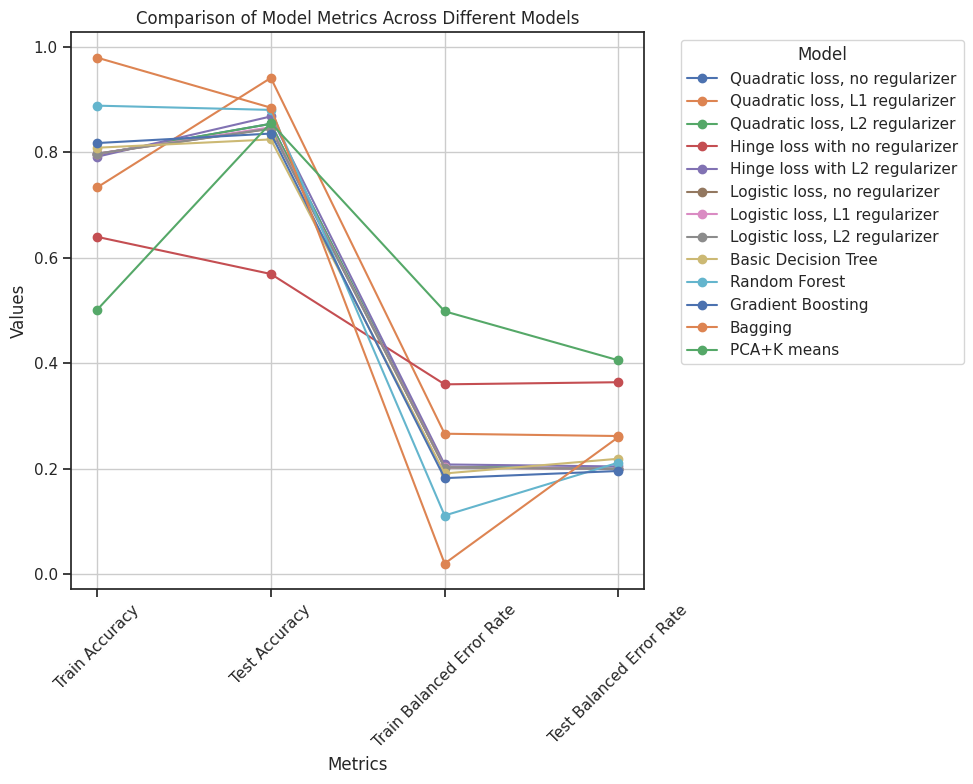

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': [
        'Quadratic loss, no regularizer', 'Quadratic loss, L1 regularizer', 'Quadratic loss, L2 regularizer',
        'Hinge loss with no regularizer', 'Hinge loss with L2 regularizer',
        'Logistic loss, no regularizer', 'Logistic loss, L1 regularizer', 'Logistic loss, L2 regularizer',
        'Basic Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging', 'PCA+K means'
    ],
    'Train Accuracy': [0.795992, 0.733300, 0.795992, 0.639733, 0.791475, 0.797233, 0.797225, 0.797358, 0.808575, 0.888283, 0.817417, 0.979275, 0.501358],
    'Test Accuracy': [0.853883, 0.940851, 0.853883, 0.569348, 0.867850, 0.844566, 0.847320, 0.844994, 0.824300, 0.880250, 0.835414, 0.884438, 0.855614],
    'Train Balanced Error Rate': [0.204008, 0.266700, 0.204008, 0.360267, 0.208525, 0.202767, 0.202775, 0.202642, 0.191425, 0.111717, 0.182583, 0.020725, 0.498642],
    'Test Balanced Error Rate': [0.200055, 0.262343, 0.200055, 0.364286, 0.204669, 0.200064, 0.199621, 0.199693, 0.219300, 0.211990, 0.196085, 0.260359, 0.405803]
}
df = pd.DataFrame(data)

df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 8))
for model in df['Model'].unique():
    subset = df_melted[df_melted['Model'] == model]
    plt.plot(subset['Metric'], subset['Value'], marker='o', label=model)

plt.title('Comparison of Model Metrics Across Different Models')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


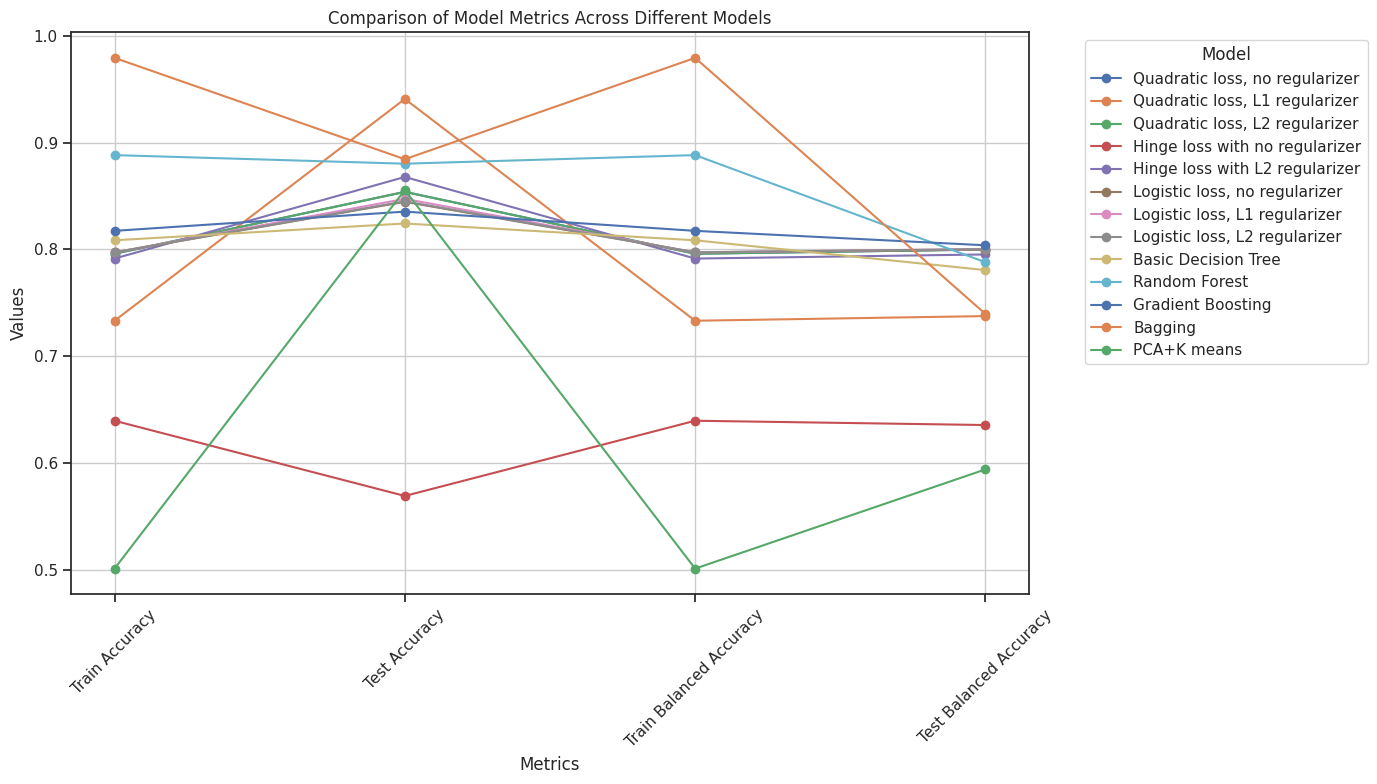

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': [
        'Quadratic loss, no regularizer', 'Quadratic loss, L1 regularizer', 'Quadratic loss, L2 regularizer',
        'Hinge loss with no regularizer', 'Hinge loss with L2 regularizer',
        'Logistic loss, no regularizer', 'Logistic loss, L1 regularizer', 'Logistic loss, L2 regularizer',
        'Basic Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging', 'PCA+K means'
    ],
    'Train Accuracy': [0.795992, 0.733300, 0.795992, 0.639733, 0.791475, 0.797233, 0.797225, 0.797358, 0.808575, 0.888283, 0.817417, 0.979275, 0.501358],
    'Test Accuracy': [0.853883, 0.940851, 0.853883, 0.569348, 0.867850, 0.844566, 0.847320, 0.844994, 0.824300, 0.880250, 0.835414, 0.884438, 0.855614],
    'Train Balanced Error Rate': [0.204008, 0.266700, 0.204008, 0.360267, 0.208525, 0.202767, 0.202775, 0.202642, 0.191425, 0.111717, 0.182583, 0.020725, 0.498642],
    'Test Balanced Error Rate': [0.200055, 0.262343, 0.200055, 0.364286, 0.204669, 0.200064, 0.199621, 0.199693, 0.219300, 0.211990, 0.196085, 0.260359, 0.405803]
}

df = pd.DataFrame(data)

df['Train Balanced Accuracy'] = 1 - df['Train Balanced Error Rate']
df['Test Balanced Accuracy'] = 1 - df['Test Balanced Error Rate']

df_melted = df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy', 'Train Balanced Accuracy', 'Test Balanced Accuracy'],
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
for model in df['Model'].unique():
    subset = df_melted[df_melted['Model'] == model]
    plt.plot(subset['Metric'], subset['Value'], marker='o', label=model)

plt.title('Comparison of Model Metrics Across Different Models')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


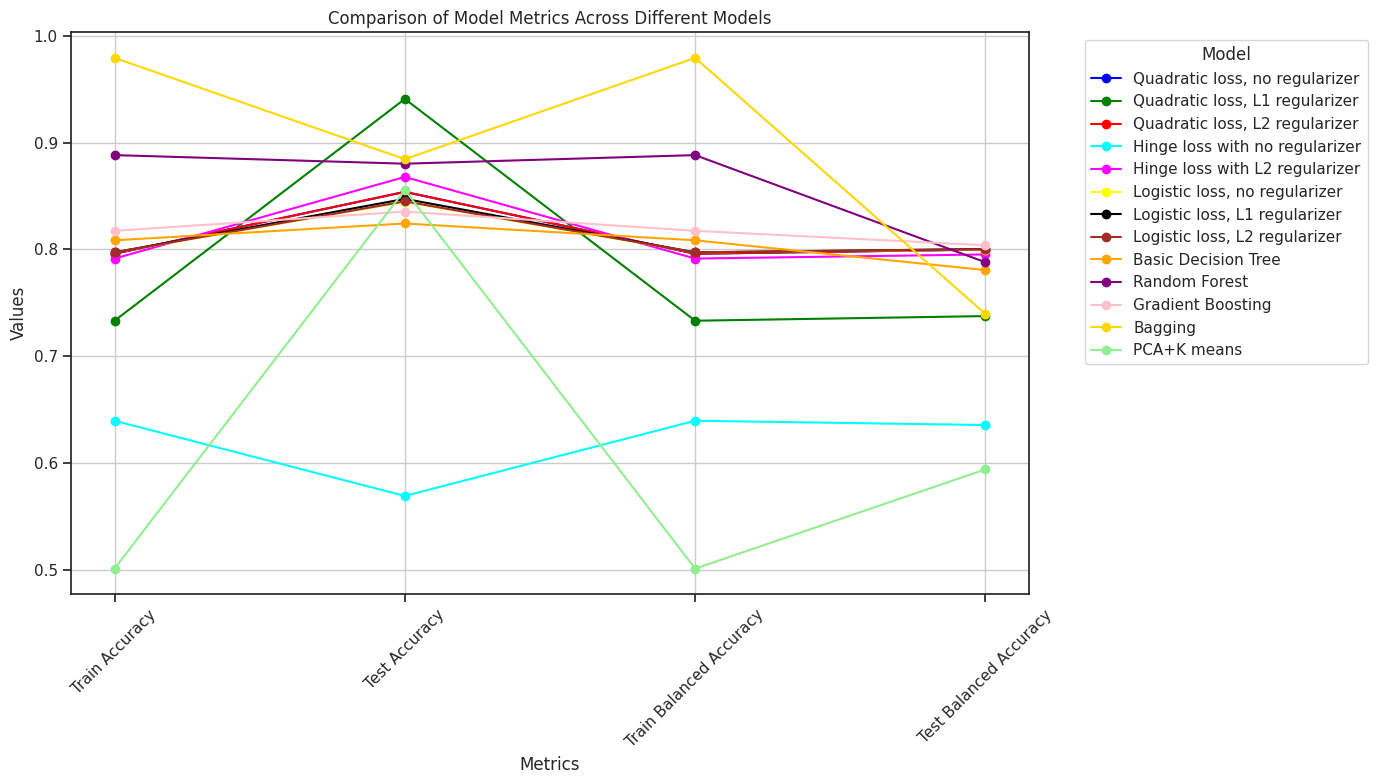

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': [
        'Quadratic loss, no regularizer', 'Quadratic loss, L1 regularizer', 'Quadratic loss, L2 regularizer',
        'Hinge loss with no regularizer', 'Hinge loss with L2 regularizer',
        'Logistic loss, no regularizer', 'Logistic loss, L1 regularizer', 'Logistic loss, L2 regularizer',
        'Basic Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging', 'PCA+K means'
    ],
    'Train Accuracy': [0.795992, 0.733300, 0.795992, 0.639733, 0.791475, 0.797233, 0.797225, 0.797358, 0.808575, 0.888283, 0.817417, 0.979275, 0.501358],
    'Test Accuracy': [0.853883, 0.940851, 0.853883, 0.569348, 0.867850, 0.844566, 0.847320, 0.844994, 0.824300, 0.880250, 0.835414, 0.884438, 0.855614],
    'Train Balanced Accuracy': [0.795992, 0.733300, 0.795992, 0.639733, 0.791475, 0.797233, 0.797225, 0.797358, 0.808575, 0.888283, 0.817417, 0.979275, 0.501358],
    'Test Balanced Accuracy': [0.799945, 0.737657, 0.799945, 0.635714, 0.795331, 0.799936, 0.800379, 0.800307, 0.780700, 0.788010, 0.803915, 0.739641, 0.594197]
}

df = pd.DataFrame(data)

df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'orange', 'purple', 'pink', 'gold', 'lightgreen']

plt.figure(figsize=(14, 8))
for i, model in enumerate(df['Model'].unique()):
    subset = df_melted[df_melted['Model'] == model]
    plt.plot(subset['Metric'], subset['Value'], colors[i], marker='o', label=model)

plt.title('Comparison of Model Metrics Across Different Models')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


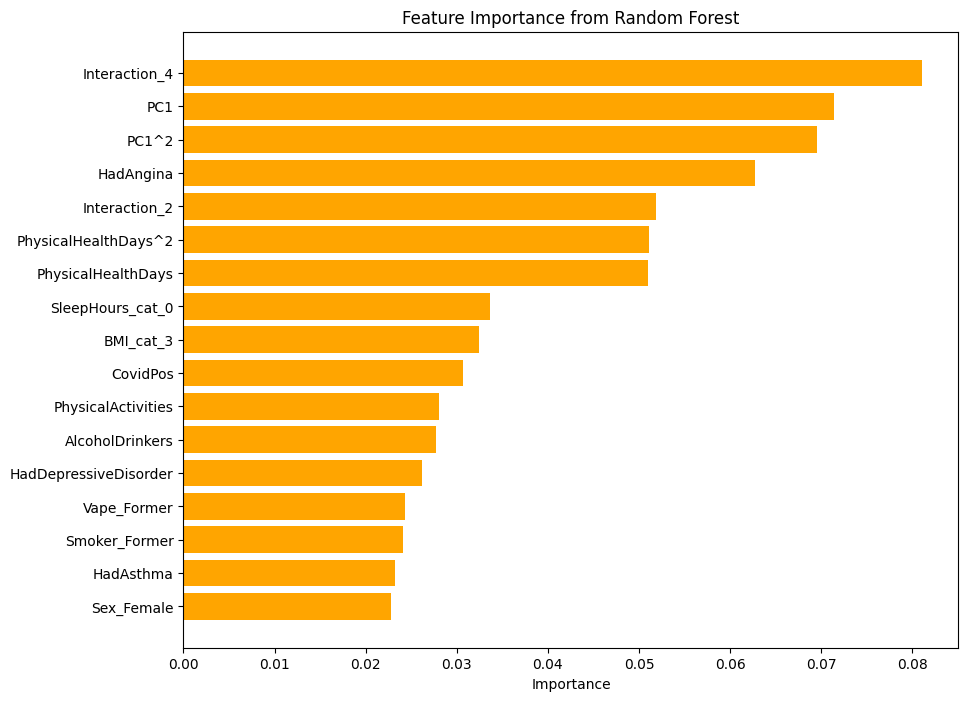

In [ ]:
import matplotlib.pyplot as plt

features = [
    'Interaction_4', 'PC1', 'PC1^2', 'HadAngina', 'Interaction_2',
    'PhysicalHealthDays^2', 'PhysicalHealthDays', 'SleepHours_cat_0', 'BMI_cat_3',
    'CovidPos', 'PhysicalActivities', 'AlcoholDrinkers', 'HadDepressiveDisorder',
    'Vape_Former', 'Smoker_Former', 'HadAsthma', 'Sex_Female'
]
importances = [
    0.08100732210357701, 0.07140301209161523, 0.06951527325892011, 0.06267745091802569,
    0.05182210170373037, 0.051090912106081514, 0.05097072860723092, 0.03364776649575081,
    0.03248663148085502, 0.03063445990986354, 0.0280970000324416, 0.02766926795925192,
    0.026213450621421067, 0.024356734791049658, 0.024078073252951873, 0.023193446153936828,
    0.02280013631043853
]

plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()
